In [1]:
import matplotlib.pyplot as plt
from decimal import Decimal
import numpy as np

In [2]:
from experiment.scenario import *
from experiment_setup.exp_utrecht_10_492_594_setup import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Setup

Check scenario settings:

In [3]:
# for i, ss in enumerate(scenario_settings):
#     print(str(i) + ": " + str(ss))

Set up experiment:

In [4]:
load_existing_experiment = True

if not load_existing_experiment:
    e = Experiment(experiment_name, experiment_dirpath, default_config, scenario_settings, scene_parts)

    print("\nSetting up experiment:")
    e.setup()
else:
    print("\nLoading existing experiment:")
    e = Experiment.load(experiment_dirpath / experiment_name, load_scenarios=True)


Loading existing experiment:

Loading experiment configuration ...
Initializing experiment ...
Loading scenarios ...


# Try reconstruction with different parameter sets

In [5]:
scenario_id = 0
e[scenario_id].setup_reconstruction_optimization()
e[scenario_id].recon_optim.load_optim_experiment()


Setting up reconstruction optimization ...
- Setting up experiment ...
- Setting up optimizer ...

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...


In [6]:
optim_scenario_id = 0
params = e[scenario_id].recon_optim.optim_experiment[optim_scenario_id].geoflow_parameters
print(json.dumps(params, indent=2, ensure_ascii=False))

{
  "r_plane_epsilon": 0.2,
  "r_plane_k": 15,
  "r_plane_min_points": 15,
  "r_plane_normal_angle": 0.75,
  "thres_alpha": 0.25,
  "r_line_epsilon": 0.4,
  "thres_reg_line_dist": 0.5,
  "thres_reg_line_ext": 1.5,
  "r_optimisation_data_term": 7.0,
  "r_normal_k": 5
}


In [7]:
e[scenario_id].set_reconstruction_params(params)


Updating reconstruction parameters ...


In [8]:
e[scenario_id].setup_reconstruction()
e[scenario_id].prepare_reconstruction()
e[scenario_id].run_reconstruction()


Starting 3D building reconstruction ...
- Command: geof C:/Users/Florian/Data/city-to-scan-to-city/utrecht_10-492-594/07_reconstruction/scenario_000/reconstruct.json --verbose --workdir --config C:/Users/Florian/Data/city-to-scan-to-city/utrecht_10-492-594/07_reconstruction/scenario_000/config.toml
- Output log file: C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594\07_reconstruction\scenario_000\geoflow_log_241001-111346.txt

Finished 3D building reconstruction after 0:02:07.587883.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.275867.

Reconstruction in scenario_000 yielded 1010 buildings.


# Select best optimization scenario

In [141]:
scenario_id = 49

In [142]:
e[scenario_id].setup_reconstruction_optimization()


Setting up reconstruction optimization ...
- Setting up experiment ...
- Setting up optimizer ...


In [143]:
e[scenario_id].recon_optim.load_optim_experiment()


Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...


In [144]:
e[scenario_id].recon_optim.target_metric

'rms_min_dist_22_mean'

In [145]:
e[scenario_id].recon_optim.select_optimal_scenario()


Selecting optimal scenario from all optimization scenarios in optimization experiment `scenario_049`.
Running additional evaluators for the optimization experiment ...

Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.032638.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.017969.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.016003.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.013036.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.014151.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.015149.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.012997.

Running 'setup_evaluation' for optim_00

## Rerun individual optimization scenarios

Mostly in cases where the Geoflow output is damaged.

In [60]:
optim_id = 31
e[scenario_id].recon_optim.optim_experiment[optim_id].setup_reconstruction()
e[scenario_id].recon_optim.optim_experiment[optim_id].prepare_reconstruction()
e[scenario_id].recon_optim.optim_experiment[optim_id].run_reconstruction(add_geoflow_params=e[scenario_id].recon_optim.add_geoflow_params)

Starting 3D building reconstruction ...

- Command: geof C:/Users/Florian/Data/city-to-scan-to-city/utrecht_10-492-594/06_reconstruction_optimization/scenario_061/07_reconstruction/optim_0031/reconstruct.json --verbose --workdir --config C:/Users/Florian/Data/city-to-scan-to-city/utrecht_10-492-594/06_reconstruction_optimization/scenario_061/07_reconstruction/optim_0031/config.toml
- Output log file: C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594\06_reconstruction_optimization\scenario_061\07_reconstruction\optim_0031\geoflow_log_240928-104749.txt

Finished 3D building reconstruction after 0:00:21.993752.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.115390.

Reconstruction in optim_0031 yielded 99 buildings.


In [63]:
e[scenario_id].recon_optim.optim_experiment[optim_id].setup_evaluation(lods=["2.2"])
e[scenario_id].recon_optim.optim_experiment[optim_id].run_evaluation(evaluator_selection="hausdorff")


Starting HausdorffLODSEvaluator ...

Setting up a HausdorffEvaluator for each LOD ...

Running HausdorffEvaluator for LOD '22' ...

Splitting OBJ files into one file per individual object ...

Identifying individual OBJ files present in both input datasets ...
- Directories:
  Input 1: C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594\01_input\OBJ\10-492-594_LOD22_mat_python
  Input 2: C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594\06_reconstruction_optimization\scenario_061\07_reconstruction\optim_0031\output\model_lod22
- File comparison: Found 1084 unique OBJ file names in total, of which
  99 file names present both directories
  985 file names present only in directory 1
  0 file names present only in directory 2
Computing Hausdorff distances between split OBJ files ...

Joining results ...

Finished HausdorffLODSEvaluator after 0:00:03.454233.


# Check reconstruction optimization for multiple scenarios

## Load experiment & get summary stats

In [5]:
best_optim_scenario_names = [scenario.best_optim_scenario_name for scenario in e[:110]]
for scenario in e[:110]:
    print(f"{scenario.name}: {scenario.best_optim_scenario_name}")

scenario_000: optim_0034
scenario_001: optim_0029
scenario_002: optim_0044
scenario_003: optim_0006
scenario_004: optim_0014
scenario_005: optim_0004
scenario_006: optim_0031
scenario_007: optim_0035
scenario_008: optim_0032
scenario_009: optim_0006
scenario_010: optim_0008
scenario_011: optim_0031
scenario_012: optim_0005
scenario_013: optim_0046
scenario_014: optim_0002
scenario_015: optim_0019
scenario_016: optim_0044
scenario_017: optim_0002
scenario_018: optim_0002
scenario_019: optim_0008
scenario_020: optim_0032
scenario_021: optim_0025
scenario_022: optim_0018
scenario_023: optim_0022
scenario_024: optim_0016
scenario_025: optim_0005
scenario_026: optim_0031
scenario_027: optim_0033
scenario_028: optim_0016
scenario_029: optim_0024
scenario_030: optim_0013
scenario_031: optim_0048
scenario_032: optim_0003
scenario_033: optim_0026
scenario_034: optim_0046
scenario_035: optim_0039
scenario_036: optim_0042
scenario_037: optim_0005
scenario_038: optim_0044
scenario_039: optim_0022


In [6]:
# So far only scenarios up to 109 were optimized, but optimization experiments up to 120 are loaded.
# This is to make the lists equally long.
best_optim_scenario_names.extend(["" for i in range(11)])
len(best_optim_scenario_names)

121

(array([12., 15.,  6., 11.,  5.,  9., 18.,  9., 13., 11.,  0.,  0.,  0.,
         1.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70.]),
 <BarContainer object of 14 artists>)

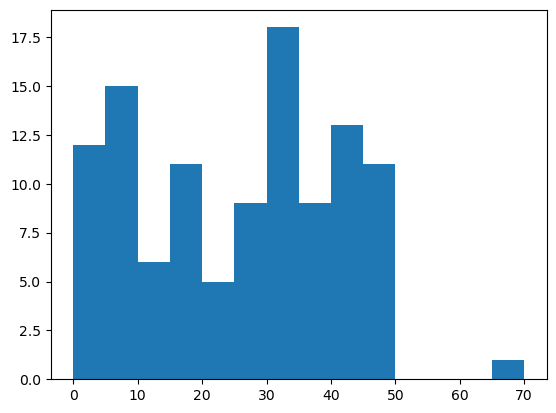

In [60]:
best_optim_scenario_numbers = [int(n[-4:]) for n in best_optim_scenario_names]
plt.hist(best_optim_scenario_numbers, bins=np.arange(0,75, 5))

In [7]:
# Load optimization scenarios
# scenarios = [55, 56, 58]
# scenarios = list(range(77,88))
scenarios = list(range(0, 121))
eos = []
for si in scenarios:
    print(si)
    eos.append(Experiment.load(e[si].recon_optim_output_dirpath, load_scenarios=True))

0

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
1

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
2

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
3

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
4

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
5

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
6

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
7

Loading experiment configuration ...
File `scenario_settings.json` not found.
In

For any and all optimization scenarios that crashed, move their folders from the settings, reconstruction, and evaluation dirpaths of the optimization experiment to the graveyard directory.

In [6]:
import shutil
graveyard_dirpath = Path(r"C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594\06_reconstruction_optimization\graveyard")
for j, eo in enumerate(eos[110:]):
    print(f"Optim experiment for scenario {j}")
    dirpaths = [eo.settings_dirpath, eo.reconstruction_dirpath, eo.evaluation_dirpath]
    for p in dirpaths:
        for f in p.iterdir():
            if f.is_dir() and "crash" in f.name:
                print(f"Moving {f.name}")
                name_new = f"scenario_{j:03}_{p.name}_{f.name}"
                f = f.rename(f.parent / name_new)
                shutil.move(f, graveyard_dirpath)

Optim experiment for scenario 0
Optim experiment for scenario 1
Optim experiment for scenario 2
Optim experiment for scenario 3
Optim experiment for scenario 4
Optim experiment for scenario 5
Optim experiment for scenario 6
Optim experiment for scenario 7
Optim experiment for scenario 8
Optim experiment for scenario 9
Optim experiment for scenario 10


In [8]:
for eo in eos:
    eo.run_steps(Scenario.setup_evaluation, lods=["2.2"])


Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.029113.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.017045.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.017031.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.018025.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.017516.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.016711.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.018600.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.016019.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after

In [7]:
# Number of optimization scenarios in which Geoflow timed out for each optim experiment
for eo in eos:
    n_opt_sc = len(eo)
    n_timeout = len([s for s in eo.scenarios.values() if s.flag_no_recon_output])
    print(f"{eo.name}: {n_timeout} / {n_opt_sc}")

scenario_000: 0 / 51
scenario_001: 0 / 51
scenario_002: 0 / 51
scenario_003: 0 / 51
scenario_004: 0 / 51
scenario_005: 0 / 51
scenario_006: 0 / 51
scenario_007: 0 / 51
scenario_008: 0 / 51
scenario_009: 0 / 51
scenario_010: 0 / 51
scenario_011: 0 / 51
scenario_012: 0 / 51
scenario_013: 0 / 51
scenario_014: 0 / 51
scenario_015: 0 / 51
scenario_016: 0 / 51
scenario_017: 0 / 51
scenario_018: 0 / 51
scenario_019: 0 / 51
scenario_020: 0 / 51
scenario_021: 0 / 51
scenario_022: 0 / 51
scenario_023: 0 / 51
scenario_024: 0 / 51
scenario_025: 0 / 51
scenario_026: 0 / 51
scenario_027: 0 / 51
scenario_028: 0 / 51
scenario_029: 0 / 51
scenario_030: 0 / 51
scenario_031: 0 / 51
scenario_032: 0 / 51
scenario_033: 0 / 51
scenario_034: 0 / 51
scenario_035: 0 / 51
scenario_036: 0 / 51
scenario_037: 0 / 51
scenario_038: 0 / 51
scenario_039: 0 / 51
scenario_040: 0 / 51
scenario_041: 0 / 51
scenario_042: 0 / 51
scenario_043: 0 / 51
scenario_044: 0 / 51
scenario_045: 0 / 51
scenario_046: 0 / 51
scenario_047:

In [8]:
# Number of optimization scenarios in which zero buildings were reconstructed OR Geoflow timed out for each optim experiment
for eo in eos:
    n_opt_sc = len(eo)
    n_timeout = len([s for s in eo.scenarios.values() if s.flag_zero_buildings_reconstructed])
    print(f"{eo.name}: {n_timeout} / {n_opt_sc}")

scenario_000: 0 / 51
scenario_001: 0 / 51
scenario_002: 0 / 51
scenario_003: 0 / 51
scenario_004: 0 / 51
scenario_005: 0 / 51
scenario_006: 0 / 51
scenario_007: 0 / 51
scenario_008: 0 / 51
scenario_009: 0 / 51
scenario_010: 0 / 51
scenario_011: 0 / 51
scenario_012: 0 / 51
scenario_013: 0 / 51
scenario_014: 0 / 51
scenario_015: 0 / 51
scenario_016: 0 / 51
scenario_017: 0 / 51
scenario_018: 0 / 51
scenario_019: 0 / 51
scenario_020: 0 / 51
scenario_021: 0 / 51
scenario_022: 0 / 51
scenario_023: 0 / 51
scenario_024: 0 / 51
scenario_025: 0 / 51
scenario_026: 0 / 51
scenario_027: 0 / 51
scenario_028: 0 / 51
scenario_029: 0 / 51
scenario_030: 0 / 51
scenario_031: 0 / 51
scenario_032: 0 / 51
scenario_033: 0 / 51
scenario_034: 0 / 51
scenario_035: 0 / 51
scenario_036: 0 / 51
scenario_037: 0 / 51
scenario_038: 0 / 51
scenario_039: 0 / 51
scenario_040: 0 / 51
scenario_041: 0 / 51
scenario_042: 0 / 51
scenario_043: 0 / 51
scenario_044: 0 / 51
scenario_045: 0 / 51
scenario_046: 0 / 51
scenario_047:

In [20]:
# Update older optimization scenarios with the path to the input geopackage building models file
for eo in eos:
    eo.default_config["evaluation_config"]["input_geopackage_filepath"] = str(input_dirpath / "GPKG" / "10-492-594.gpkg")
    for name, scenario in eo.scenarios.items():
        scenario.config["evaluation_config"]["input_geopackage_filepath"] = str(input_dirpath / "GPKG" / "10-492-594.gpkg")
    eo.save()

Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving experiment configuration ...
Saving scenario configurations ...
Saving

In [9]:
# Run additional evaluator to check their results. They may already have been run while running ReconstructionOptimization.select_optimal_scenario().
for eo in eos[110:]:
    eo.run_steps(Scenario.run_evaluation, evaluator_selection=["complexity", "complexity_diff"])


Running 'run_evaluation' for optim_0000 ...

Starting ComplexityEvaluator ...
Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:00.168643.

Starting ComplexityDifferenceEvaluator ...

Starting ComplexityEvaluator ...
Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:00.217089.

Evaluation results for complexity evaluator 2 already exist. Will not reevaluate.

Finished ComplexityDifferenceEvaluator after 0:00:00.243836.

Finished 'run_evaluation' for optim_0000 after 0:00:00.412480.

Running 'run_evaluation' for optim_0001 ...

Starting ComplexityEvaluator ...
Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:00.110544.

Starting ComplexityDifferenceEvaluator ...

Evaluation results for complexity evaluator 1 already exist. Will not reevaluate.

Evaluation results for complexity evaluator 2 already exist. Will not reevaluate.

Finished ComplexityDifferenceEvaluator after 0:00:00.035058.

Finished 'run_evaluation' for opt

In [15]:
# Compute summary statistics for the evaluators whose results are available
for eo in eos[110:]:
    # eo.compute_summary_statistics(evaluator_selection=["hausdorff", "complexity", "iou_3d", "geoflow_output"], ignore_missing=True)
    eo.compute_summary_statistics(evaluator_selection=["hausdorff", "complexity", "complexity_diff"], ignore_missing=True)


Computing summary statistics of 41 scenarios ...



Computing summary statistics of 41 scenarios ...

Computing summary statistics of 41 scenarios ...









Computing summary statistics of 41 scenarios ...

























Computing summary statistics of 41 scenarios ...



























Computing summary statistics of 41 scenarios ...


















Computing summary statistics of 41 scenarios ...































Computing summary statistics of 41 scenarios ...
























Computing summary statistics of 41 scenarios ...


























Computing summary statistics of 41 scenarios ...
































Computing summary statistics of 41 scenarios ...






















In [9]:
# If summary stats were computed previously, this will simply load the values
ss = [eo.summary_stats for eo in eos]

Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistic

In [10]:
# Create a column that indicates the scenario with the "best" params
# (as integer, so it can be used to color dots in plots)
for i in range(len(ss)):
    ss[i]["is_best"] = (ss[i].index == best_optim_scenario_names[i]).astype(int)

In [101]:
# Create a column that indicates the scenarios that are not worse by more than a certain amount than the best target metric value
for i in range(len(ss)):
    ss[i]["best_pct"] = (ss[i]["rms_min_dist_22_mean"] <= 1.2 * ss[i]["rms_min_dist_22_mean"].min()).astype(int)

## Compute rankings

In [11]:
def compute_metric_ranks(s: pd.DataFrame):
    # -------------------------------------------------------------------------------------
    # Compute ranks for quality metric columns
    rank_columns = ["rms_min_dist_22_mean", "hausdorff_22_rms", "n_faces_22_mean", "n_faces_22_abs_diff_mean", "n_faces_22_norm_abs_diff_mean", "iou_22_mean"]
    ascending = [True, True, True, True, True, False]
    
    rank_columns = [(c, a) for c, a in zip(rank_columns, ascending) if c in s.columns]
    
    for c, a in rank_columns:
        s["rank_" + c] = s[c].rank(ascending=a)
    
    rank_sum_columns = ["rank_rms_min_dist_22_mean", "rank_n_faces_22_mean", "rank_iou_22_mean"]
    rank_sum_column_weights = [0.75, 1.5, 0.75]  # equals [1, 2, 1] in effect, but makes absolute values comparable to unweighted rank (sum of 3)
    
    rank_sum_column_weights = [(c, w) for c, w in zip(rank_sum_columns, rank_sum_column_weights) if c in s.columns] 
    rank_sum_columns = [c for c in rank_sum_columns if c in s.columns]

    # Sum up the ranks (except Hausdorff) to be able to pick the best performing on average
    s["rank_sum"] = s[rank_sum_columns].sum(axis=1).rank()  # sum up the rank values across the columns
    
    # Sum up the ranks, weighting the number of faces twice as much as the other two
    s["rank_sum_weighted"] = pd.DataFrame.from_dict({c: w * s[c] for c, w in rank_sum_column_weights}).sum(axis=1).rank()
    
    # -------------------------------------------------------------------------------------
    # Compute ranks based on value ranges of the quality metrics
    for c, a in rank_columns:
        if a:
            s["rangerank_" + c] = (s[c] - s[c].min()) / (s[c].max() - s[c].min())
        else:
            s["rangerank_" + c] = (s[c].max() - s[c]) / (s[c].max() - s[c].min())
    
    rangerank_sum_columns = ["rangerank_rms_min_dist_22_mean", "rangerank_n_faces_22_mean", "rangerank_iou_22_mean"]
    rangerank_sum_column_weights = [0.75, 1.5, 0.75]  # equals [1, 2, 1] in effect, but makes absolute values comparable to unweighted rank (sum of 3)
    
    rangerank_sum_column_weights = [(c, w) for c, w in zip(rangerank_sum_columns, rangerank_sum_column_weights) if c in s.columns]
    rangerank_sum_columns = [c for c in rangerank_sum_columns if c in s.columns]
    
    s["rangerank_sum"] = s[rangerank_sum_columns].sum(axis=1)  # sum up the rank values across the columns
    
    # Sum up the ranks, weighting the number of faces twice as much as the other two
    
    s["rangerank_sum_weighted"] = pd.DataFrame.from_dict({c: w * s[c] for c, w in rangerank_sum_column_weights}).sum(axis=1)
    
    return s

In [12]:
for i in range(len(ss)):
    ss[i] = compute_metric_ranks(ss[i])

In [13]:
relevant_columns = [
    "is_best",
    
    "rms_min_dist_22_mean",
    "hausdorff_22_rms",
    "n_faces_22_mean",
    "n_faces_22_abs_diff_mean",
    "n_faces_22_norm_abs_diff_mean",
    "iou_22_mean",
    
    "rank_rms_min_dist_22_mean",
    "rank_hausdorff_22_rms",
    "rank_n_faces_22_mean",
    # "rank_n_faces_22_abs_diff_mean",
    # "rank_n_faces_22_norm_abs_diff_mean",
    "rank_iou_22_mean",
    "rank_sum",
    "rank_sum_weighted",
    
    "rangerank_rms_min_dist_22_mean",
    "rangerank_hausdorff_22_rms",
    "rangerank_n_faces_22_mean",
    # "rangerank_n_faces_22_abs_diff_mean",
    # "rangerank_n_faces_22_norm_abs_diff_mean",
    "rangerank_iou_22_mean",
    "rangerank_sum",
    "rangerank_sum_weighted"
]
relevant_columns_by_metric = [
    "rank_sum",
    "rank_sum_weighted",
    "rms_min_dist_22_mean",
    "rank_rms_min_dist_22_mean",
    "rangerank_rms_min_dist_22_mean",
    "iou_22_mean",
    "rank_iou_22_mean",
    "rangerank_iou_22_mean",
    "n_faces_22_mean",
    "rank_n_faces_22_mean",
    "rangerank_n_faces_22_mean",
    "hausdorff_22_rms",
    "rank_hausdorff_22_rms",
    "rangerank_hausdorff_22_rms",
    "rangerank_sum",
    "rangerank_sum_weighted",
]

In [14]:
relevant_columns = [c for c in relevant_columns if c in ss[0].columns]

In [ ]:
# Get summary statistics (describe()) across all optimization scenarios of each optimization experiment
for s in ss:
    relevant_columns = [c for c in relevant_columns if c in s.columns]
    relevant_columns_by_metric = [c for c in relevant_columns_by_metric if c in s.columns]
    display(s.loc[:, relevant_columns].describe())

In [24]:
ss[109].loc[:, [c for c in relevant_columns if c in ss[0].columns]].describe()

rms_min_dist_22_mean  hausdorff_22_rms  n_faces_22_mean  \
count             32.000000         32.000000        32.000000   
mean               0.393304          2.282603       690.248505   
std                0.104296          0.436305       347.823333   
min                0.317427          1.943296        49.600000   
25%                0.336420          2.021523       488.504561   
50%                0.360821          2.170414       671.727273   
75%                0.397019          2.288839       831.112709   
max                0.767662          3.780129      1533.909091   

       n_faces_22_abs_diff_mean  n_faces_22_norm_abs_diff_mean  \
count                 32.000000                      32.000000   
mean                 653.320398                      14.484735   
std                  347.025097                       7.380534   
min                   23.777778                       0.982085   
25%                  450.972145                       9.883540   
50%                  634.434343                      13.698537   
75%                  793.580293                      17.280300   
max                 1496.616162                      33.213566   

       rank_rms_min_dist_22_mean  rank_hausdorff_22_rms  rank_n_faces_22_mean  \
count                  32.000000              32.000000             32.000000   
mean                   16.500000              16.500000             16.500000   
std                     9.380832               9.380832              9.380832   
min                     1.000000               1.000000              1.000000   
25%                     8.750000               8.750000              8.750000   
50%                    16.500000              16.500000             16.500000   
75%                    24.250000              24.250000             24.250000   
max                    32.000000              32.000000             32.000000   

       rank_n_faces_22_abs_diff_mean  rank_n_faces_22_norm_abs_diff_mean  \
count                      32.000000                           32.000000   
mean                       16.500000                           16.500000   
std                         9.380832                            9.380832   
min                         1.000000                            1.000000   
25%                         8.750000                            8.750000   
50%                        16.500000                           16.500000   
75%                        24.250000                           24.250000   
max                        32.000000                           32.000000   

        rank_sum  rank_sum_weighted  rangerank_rms_min_dist_22_mean  \
count  41.000000          41.000000                       32.000000   
mean   21.000000          21.000000                        0.168527   
std    11.904306          11.911654                        0.231648   
min     5.000000           5.000000                        0.000000   
25%    11.000000          11.000000                        0.042185   
50%    20.500000          21.500000                        0.096381   
75%    30.000000          31.000000                        0.176779   
max    41.000000          41.000000                        1.000000   

       rangerank_hausdorff_22_rms  rangerank_n_faces_22_mean  \
count                   32.000000                  32.000000   
mean                     0.184724                   0.431614   
std                      0.237531                   0.234333   
min                      0.000000                   0.000000   
25%                      0.042588                   0.295696   
50%                      0.123646                   0.419136   
75%                      0.188119                   0.526516   
max                      1.000000                   1.000000   

       rangerank_n_faces_22_abs_diff_mean  \
count                           32.000000   
mean                             0.427435   
std                              0.235617   
min  

In [19]:
ss[0].describe()

target_density  pulse_freq_hz  scan_freq_hz  point_spacing_along  \
count            51.0           51.0          51.0         5.100000e+01   
mean              2.0        94407.0          85.0         7.058824e-01   
std               0.0            0.0           0.0         2.242541e-16   
min               2.0        94407.0          85.0         7.058824e-01   
25%               2.0        94407.0          85.0         7.058824e-01   
50%               2.0        94407.0          85.0         7.058824e-01   
75%               2.0        94407.0          85.0         7.058824e-01   
max               2.0        94407.0          85.0         7.058824e-01   

       point_spacing_across  std_horizontal_error  std_vertical_error  \
count          5.100000e+01                  51.0                51.0   
mean           3.277031e-01                   0.0                 0.0   
std            5.606351e-17                   0.0                 0.0   
min            3.277031e-01                   0.0                 0.0   
25%            3.277031e-01                   0.0                 0.0   
50%            3.277031e-01                   0.0                 0.0   
75%            3.277031e-01                   0.0                 0.0   
max            3.277031e-01                   0.0                 0.0   

       r_plane_epsilon  r_plane_k  r_plane_min_points  ...  \
count        51.000000  51.000000           51.000000  ...   
mean          0.753683  15.725490           15.725490  ...   
std           0.535926   4.939953            4.939953  ...   
min           0.100000  10.000000           10.000000  ...   
25%           0.268696  12.000000           12.000000  ...   
50%           0.772243  15.000000           15.000000  ...   
75%           0.986117  19.000000           19.000000  ...   
max           1.932667  29.000000           29.000000  ...   

       rank_rms_min_dist_22_mean  rank_hausdorff_22_rms  rank_n_faces_22_mean  \
count                  51.000000              51.000000             51.000000   
mean                   26.000000              26.000000             26.000000   
std                    14.866069              14.866069             14.866069   
min                     1.000000               1.000000              1.000000   
25%                    13.500000              13.500000             13.500000   
50%                    26.000000              26.000000             26.000000   
75%                    38.500000              38.500000             38.500000   
max                    51.000000              51.000000             51.000000   

        rank_sum  rank_sum_weighted  rangerank_rms_min_dist_22_mean  \
count  51.000000          51.000000                       51.000000   
mean   26.000000          26.000000                        0.257634   
std    14.788171          14.857994                        0.208245   
min     1.000000           1.000000                        0.000000   
25%    15.500000          13.750000                        0.125475   
50%    23.500000          25.500000                        0.220286   
75%    38.500000          38.500000                        0.329334   
max    51.000000          51.000000                        1.000000   

       rangerank_hausdorff_22_rms  rangerank_n_faces_22_mean  rangerank_sum  \
count                   51.000000                  51.000000      51.000000   
mean                     0.253138                   0.456427       0.714061   
std                      0.213468                   0.261359       0.172138   
min                      0.000000                   0.000000       0.450396   
25%                      0.105592                   0.226770       0.584532   
50%                      0.212054                   0.450304       0.672254   
75%                      0.366720                   0.587652       0.811697   
max                      1.000000                   1.000000       1.159048   

       rangerank_sum_weighted  


## Best results in target metric(s)

In [10]:
# The best performing parameter set was stored in the parent scenario's reconstruction config.
# (They may have been overwritten if the parent scenario or experiment was setup and saved newly.)
e[55].config["reconstruction_config"]["geoflow_parameters"], e[58].config["reconstruction_config"]["geoflow_parameters"]

({'r_plane_epsilon': 0.1,
  'r_plane_k': 10,
  'r_plane_min_points': 10,
  'r_plane_normal_angle': 0.75,
  'thres_alpha': 0.1,
  'r_line_epsilon': 1.0,
  'thres_reg_line_dist': 0.1,
  'thres_reg_line_ext': 3.0,
  'r_optimisation_data_term': 8.698984967686583,
  'r_normal_k': 5},
 {'r_plane_epsilon': 0.4293012024962771,
  'r_plane_k': 21,
  'r_plane_min_points': 21,
  'r_plane_normal_angle': 0.75,
  'thres_alpha': 0.9498021758737271,
  'r_line_epsilon': 0.873285883508877,
  'thres_reg_line_dist': 0.7336896961511815,
  'thres_reg_line_ext': 2.147383113129192,
  'r_optimisation_data_term': 6.591872904991047,
  'r_normal_k': 5})

In [16]:
def get_best_results(s: pd.DataFrame):
    columns = []
    columns.extend(["iou_22_mean", "rank_iou_22_mean"])
    columns.extend(["hausdorff_22_rms", "rank_hausdorff_22_rms"])
    columns.extend(["rms_min_dist_22_mean", "rank_rms_min_dist_22_mean"])
    columns.extend(["n_faces_22_mean", "rank_n_faces_22_mean"])
    columns.extend(["n_faces_22_std"])
    columns.extend(["gpkg_unique_22"])
    # columns.extend(["area_22_mean_abs_diff"])
    columns.extend(list(glb.geoflow_parameters_default.keys()))
    
    # return s[(s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]
    return s[(s["iou_22_mean"] == max(s["iou_22_mean"])) | (s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]

display(get_best_results(ss[0]))
display(get_best_results(ss[1]))

iou_22_mean  rank_iou_22_mean  hausdorff_22_rms  \
name                                                          
optim_0057     0.976519               1.0          1.453439   
optim_0093     0.973696             112.0          1.135703   
optim_0179     0.974385              26.0          1.152552   

            rank_hausdorff_22_rms  rms_min_dist_22_mean  \
name                                                      
optim_0057                   98.0              0.103931   
optim_0093                    1.0              0.096163   
optim_0179                    4.0              0.095185   

            rank_rms_min_dist_22_mean  n_faces_22_mean  rank_n_faces_22_mean  \
name                                                                           
optim_0057                       43.0       221.262626                 124.0   
optim_0093                        2.0       243.939394                 167.0   
optim_0179                        1.0       255.191919                 193.0   

            n_faces_22_std  gpkg_unique_22  r_plane_epsilon  r_plane_k  \
name                                                                     
optim_0057      254.109794              99              0.1         19   
optim_0093      266.913799              99              0.1         10   
optim_0179      288.673238              99              0.1         10   

            r_plane_min_points  r_plane_normal_angle  thres_alpha  \
name                                                                
optim_0057                  19                  0.75          0.1   
optim_0093                  10                  0.75          1.0   
optim_0179                  10                  0.75          0.1   

            r_line_epsilon  thres_reg_line_dist  thres_reg_line_ext  \
name                                                                  
optim_0057             1.0                  1.0            1.873862   
optim_0093             1.0                  0.1            1.000000   
optim_0179             1.0                  0.1            3.000000   

            r_optimisation_data_term  r_normal_k  
name                                              
optim_0057                  9.712897           5  
optim_0093                  8.495240           5  
optim_0179                  8.698985           5

iou_22_mean  rank_iou_22_mean  hausdorff_22_rms  \
name                                                          
optim_0116     0.959278               1.0          1.625242   
optim_0179     0.958624               2.0          1.560154   
optim_0187     0.947063              59.0          1.486421   

            rank_hausdorff_22_rms  rms_min_dist_22_mean  \
name                                                      
optim_0116                   33.0              0.176198   
optim_0179                   14.0              0.167815   
optim_0187                    1.0              0.191744   

            rank_rms_min_dist_22_mean  n_faces_22_mean  rank_n_faces_22_mean  \
name                                                                           
optim_0116                        7.0       256.494949                 151.0   
optim_0179                        1.0       231.636364                 107.0   
optim_0187                       33.0       273.222222                 177.0   

            n_faces_22_std  gpkg_unique_22  r_plane_epsilon  r_plane_k  \
name                                                                     
optim_0116      308.876779              99         0.388718         25   
optim_0179      275.346959              99         0.429301         21   
optim_0187      343.303060              99         1.026475         14   

            r_plane_min_points  r_plane_normal_angle  thres_alpha  \
name                                                                
optim_0116                  25                  0.75     0.268070   
optim_0179                  21                  0.75     0.949802   
optim_0187                  14                  0.75     0.506603   

            r_line_epsilon  thres_reg_line_dist  thres_reg_line_ext  \
name                                                                  
optim_0116        0.798191             0.471644            1.937297   
optim_0179        0.873286             0.733690            2.147383   
optim_0187        0.843813             0.646331            2.607695   

            r_optimisation_data_term  r_normal_k  
name                                              
optim_0116                  9.715050           5  
optim_0179                  6.591873           5  
optim_0187                  5.812260           5

## Individual scenarios: Tables

### Results for each scenario for the optimization scenario using Geoflow default parameters.

In [30]:
pd.concat([s.loc["optim_0000", ["target_density", "std_horizontal_error", *relevant_columns]] for s in ss], axis=1).transpose()

target_density  std_horizontal_error  rms_min_dist_22_mean  \
optim_0000        2.000000                   0.0              0.459420   
optim_0000        2.000000                   0.1              0.539377   
optim_0000        2.000000                   0.2              0.594702   
optim_0000        2.000000                   0.3              0.681117   
optim_0000        2.000000                   0.4              0.768311   
...                    ...                   ...                   ...   
optim_0000       45.254834                   0.6              0.286241   
optim_0000       45.254834                   0.7              0.297924   
optim_0000       45.254834                   0.8              0.311707   
optim_0000       45.254834                   0.9              0.355449   
optim_0000       45.254834                   1.0              0.361569   

            hausdorff_22_rms  n_faces_22_mean  n_faces_22_abs_diff_mean  \
optim_0000          2.958652        79.541667                 42.937500   
optim_0000          3.051236        94.969072                 58.711340   
optim_0000          3.501503        54.755556                 23.922222   
optim_0000          3.851687        42.619048                 18.690476   
optim_0000          4.100540        40.370370                 17.703704   
...                      ...              ...                       ...   
optim_0000          1.696598      1176.780000               1139.800000   
optim_0000          1.838211      1286.383838               1249.464646   
optim_0000          1.872287      1216.840000               1179.860000   
optim_0000          1.957082      1211.150000               1174.170000   
optim_0000          1.943296      1263.656566               1226.363636   

            n_faces_22_norm_abs_diff_mean  rank_rms_min_dist_22_mean  \
optim_0000                       1.491062                       36.0   
optim_0000                       1.887363                       42.0   
optim_0000                       0.998022                       42.0   
optim_0000                       0.853120                       48.0   
optim_0000                       0.721216                       50.0   
...                                   ...                        ...   
optim_0000                      26.870543                       11.0   
optim_0000                      29.472986                       18.0   
optim_0000                      28.561906                        9.0   
optim_0000                      27.838910                       16.0   
optim_0000                      28.882505                       17.0   

            rank_hausdorff_22_rms  rank_n_faces_22_mean  ...  \
optim_0000                   33.0                  15.0  ...   
optim_0000                   37.0                  20.0  ...   
optim_0000                   41.0                   9.0  ...   
optim_0000                   49.0                   4.0  ...   
optim_0000                   49.0                   7.0  ...   
...                           ...                   ...  ...   
optim_0000                    2.0                  12.0  ...   
optim_0000                    4.0                  21.0  ...   
optim_0000                    4.0                  20.0  ...   
optim_0000                    5.0                  17.0  ...   
optim_0000                    1.0                  30.0  ...   

            rank_n_faces_22_norm_abs_diff_mean  rank_sum  rank_sum_weighted  \
optim_0000                                15.0      23.5               11.0   
optim_0000                                11.0      46.5               27.0   
optim_0000                                 9.0      23.0                8.0   
optim_0000                                 5.0      33.5                5.5   
optim_0000                                12.0      38.5               13.0   
...                                        ...       ...                ...   
optim_0000                         

### Top quantiles

Get all optim scenarios for which the target metric (rms min dist) is below a certain quantile.

In [12]:
s = ss[0]
s[s.rms_min_dist_22_mean < s.rms_min_dist_22_mean.quantile(q=0.05)].loc[:, relevant_columns]

rms_min_dist_22_mean  n_faces_22_mean  rank_rms_min_dist_22_mean  \
name                                                                           
optim_0011              0.254282      1352.929293                        3.0   
optim_0025              0.248652      1236.646465                        2.0   
optim_0042              0.248323       829.545455                        1.0   

            rank_n_faces_22_mean  rank_sum  rank_sum_weighted  \
name                                                            
optim_0011                  49.0      26.0               42.0   
optim_0025                  46.0      19.5               37.5   
optim_0042                  28.0       3.0               15.0   

            rangerank_rms_min_dist_22_mean  rangerank_n_faces_22_mean  \
name                                                                    
optim_0011                        0.019477                   0.866449   
optim_0025                        0.001077                   0.768890   
optim_0042                        0.000000                   0.427339   

            rangerank_sum  rangerank_sum_weighted  
name                                               
optim_0011       0.885926                1.314281  
optim_0025       0.769967                1.154142  
optim_0042       0.427339                0.641008

Get all optim scenarios for which the target metric (rms min dist) does not exceed the optimum target metric value by more than `threshold_ratio` times the range of target metric values (i.e., target metric maximum minus minimum).

In [29]:
s = ss[99]
threshold_ratio = 1.1  # 0.03
s[
    s.rms_min_dist_22_mean < (
            s.rms_min_dist_22_mean.min() + threshold_ratio*(s.rms_min_dist_22_mean.max() - s.rms_min_dist_22_mean.min())
    )
].loc[:, relevant_columns]

rms_min_dist_22_mean  hausdorff_22_rms  n_faces_22_mean  \
name                                                                  
optim_0000              0.096068          1.063987       253.010101   
optim_0001              0.211788          1.594834       193.888889   
optim_0002              0.163214          1.338139       249.656566   
optim_0003              0.124378          1.194219       233.434343   
optim_0004              0.106387          1.059157       236.535354   
optim_0005              0.199296          1.680833       227.636364   
optim_0006              0.088287          1.060595       244.414141   
optim_0007              0.176532          1.409437       198.848485   
optim_0008              0.092466          1.076411       241.919192   
optim_0009              0.096007          1.088353       234.828283   
optim_0010              0.091052          1.039922       300.080808   
optim_0011              0.275343          1.782316       226.666667   
optim_0012              0.090057          1.114130       307.454545   
optim_0013              0.096266          1.099760       236.777778   
optim_0014              0.094003          0.981907       300.505051   
optim_0015              0.110352          1.120678       275.818182   
optim_0016              0.088645          0.905959       386.909091   
optim_0017              0.095404          1.164288       262.626263   
optim_0018              0.112207          1.208573       360.272727   
optim_0019              0.103908          1.052334       330.060606   
optim_0020              0.089505          0.998585       312.525253   
optim_0021              0.083805          0.964673       311.656566   
optim_0022              0.087328          1.007890       285.212121   
optim_0023              0.095312          1.059936       286.393939   
optim_0024              0.092699          1.069506       245.939394   
optim_0025              0.090263          1.129134       302.606061   
optim_0026              0.094312          1.092987       241.595960   
optim_0027              0.086966          1.094384       311.515152   
optim_0028              0.095250          1.090123       245.515152   
optim_0029              0.098277          1.072010       256.606061   
optim_0030              0.092578          1.078498       239.959596   
optim_0031              0.094711          0.994655       343.191919   
optim_0032              0.085152          0.965925       261.030303   
optim_0033              0.091305          1.061921       272.454545   
optim_0034              0.088215          1.111101       312.161616   
optim_0035              0.108908          1.171878       266.727273   
optim_0036              0.093472          1.061056       279.878788   
optim_0037              0.097025          1.084707       276.141414   
optim_0038              0.095303          1.059396       285.727273   
optim_0039              0.089283          0.909314       422.606061   
optim_0040              0.100876          1.072249       329.333333   

            n_faces_22_abs_diff_mean  n_faces_22_norm_abs_diff_mean  \
name                                                                  
optim_0000                216.090909                       5.376501   
optim_0001                156.969697                       4.481428   
optim_0002                212.737374                       5.525825   
optim_0003                196.515152                       5.272548   
optim_0004                199.616162                       5.306838   
optim_0005                190.717172                       5.398097   
optim_0006                207.494949                       5.488636   
optim_0007                161.929293                       4.704181   
optim_0008                205.000000                       5.356924   
optim_0009                197.909091                       5.325245   
optim_0010                263.161616                       6.656220   
optim_0011                189.74747

In [36]:
s[~s.iou_22_mean.isna()].loc[:, ["r_plane_epsilon", "r_plane_min_points", *relevant_columns]]

r_plane_epsilon  r_plane_min_points  rms_min_dist_22_mean  \
name                                                                    
optim_0000         0.200000                  15              0.109180   
optim_0001         1.490788                  22              0.253957   
optim_0002         1.445338                  10              0.175587   
optim_0003         0.678060                  20              0.154793   
optim_0004         0.796088                  19              0.177115   
...                     ...                 ...                   ...   
optim_0196         2.000000                  10              0.102293   
optim_0197         2.000000                  11              0.101179   
optim_0198         2.000000                  13              0.107386   
optim_0199         1.026526                  11              0.147752   
optim_0200         2.000000                  13              0.107941   

            n_faces_22_mean  iou_22_mean  rank_rms_min_dist_22_mean  \
name                                                                  
optim_0000       195.333333     0.973665                      112.0   
optim_0001       166.232323     0.936456                      178.0   
optim_0002       168.505051     0.957669                      158.0   
optim_0003       182.969697     0.963541                      155.0   
optim_0004       175.868687     0.956053                      160.0   
...                     ...          ...                        ...   
optim_0196       207.353535     0.974128                       29.0   
optim_0197       239.858586     0.973340                       20.0   
optim_0198       252.565657     0.973975                       89.0   
optim_0199       215.454545     0.960840                      154.0   
optim_0200       239.878788     0.973482                       94.0   

            rank_n_faces_22_mean  rank_iou_22_mean  rank_sum  \
name                                                           
optim_0000                  48.0             115.0      76.0   
optim_0001                  23.0             181.0     162.0   
optim_0002                  26.0             158.0     128.0   
optim_0003                  41.0             153.0     132.0   
optim_0004                  34.0             165.0     141.5   
...                          ...               ...       ...   
optim_0196                  92.0              51.0       7.0   
optim_0197                 147.0             132.0      98.0   
optim_0198                 179.0              75.0     129.0   
optim_0199                 121.0             155.0     198.0   
optim_0200                 148.5             127.0     149.0   

            rank_sum_weighted  rangerank_rms_min_dist_22_mean  \
name                                                            
optim_0000               37.0                        0.057005   
optim_0001               97.5                        0.646716   
optim_0002               65.0                        0.327497   
optim_0003               83.0                        0.242797   
optim_0004               86.0                        0.333720   
...                       ...                             ...   
optim_0196                6.0                        0.028950   
optim_0197              143.0                        0.024415   
optim_0198              187.0                        0.049698   
optim_0199              198.0                        0.214116   
optim_0200              185.0                        0.051957   

            rangerank_n_faces_22_mean  rangerank_iou_22_mean  rangerank_sum  \
name                                                                          
optim_0000                   0.452332               0.048559       0.557896   
optim_0001                   0.284550               0.681755       1.613020   
optim_0002                   0.297653               0.320772       0.945922   
optim_0003                   0.381049               0.220842    

# Best optimization scenarios

In [18]:
best_optim_scenarios = pd.concat(
#    [ss[i].loc[best_optim_scenario_names[i], :] for i in range(110)],
    [ss[i].loc[best_optim_scenario_names[i], ["target_density", "std_horizontal_error", *relevant_columns]] for i in range(110)],
    axis=1,
    keys=zip(range(110), best_optim_scenario_names[:110])
).transpose()

In [19]:
best_optim_scenarios  #.loc[[i*11-1 for i in range(1,10)], :]

target_density  pulse_freq_hz  scan_freq_hz  \
0   optim_0034        2.000000        94407.0          85.0   
1   optim_0029        2.000000        94407.0          85.0   
2   optim_0044        2.000000        94407.0          85.0   
3   optim_0006        2.000000        94407.0          85.0   
4   optim_0014        2.000000        94407.0          85.0   
...                        ...            ...           ...   
105 optim_0010       45.254834      2136177.0         404.0   
106 optim_0038       45.254834      2136177.0         404.0   
107 optim_0038       45.254834      2136177.0         404.0   
108 optim_0033       45.254834      2136177.0         404.0   
109 optim_0009       45.254834      2136177.0         404.0   

                point_spacing_along  point_spacing_across  \
0   optim_0034             0.705882              0.327703   
1   optim_0029             0.705882              0.327703   
2   optim_0044             0.705882              0.327703   
3   optim_0006             0.705882              0.327703   
4   optim_0014             0.705882              0.327703   
...                             ...                   ...   
105 optim_0010             0.148515              0.068835   
106 optim_0038             0.148515              0.068835   
107 optim_0038             0.148515              0.068835   
108 optim_0033             0.148515              0.068835   
109 optim_0009             0.148515              0.068835   

                std_horizontal_error  std_vertical_error  r_plane_epsilon  \
0   optim_0034                   0.0                0.00         0.438690   
1   optim_0029                   0.1                0.03         1.238662   
2   optim_0044                   0.2                0.06         0.288440   
3   optim_0006                   0.3                0.09         0.682584   
4   optim_0014                   0.4                0.12         0.426413   
...                              ...                 ...              ...   
105 optim_0010                   0.6                0.18         0.994358   
106 optim_0038                   0.7                0.21         0.918644   
107 optim_0038                   0.8                0.24         1.245446   
108 optim_0033                   0.9                0.27         1.138001   
109 optim_0009                   1.0                0.30         0.575745   

                r_plane_k  r_plane_min_points  ...  cj_buildings_one_bp  \
0   optim_0034       11.0                11.0  ...                  NaN   
1   optim_0029       14.0                14.0  ...                  NaN   
2   optim_0044       11.0                11.0  ...                  NaN   
3   optim_0006       10.0                10.0  ...                  NaN   
4   optim_0014       18.0                18.0  ...                  NaN   
...                   ...                 ...  ...                  ...   
105 optim_0010       13.0                13.0  ...                  NaN   
106 optim_0038       24.0                24.0  ...                  NaN   
107 optim_0038       22.0                22.0  ...                  NaN   
108 optim_0033       24.0                24.0  ...                  NaN   
109 optim_0009       16.0                16.0  ...                  NaN   

                cj_buildings_multiple_bp  iou_22_count  iou_22_rms  \
0   optim_0034                       NaN           NaN         NaN   
1   optim_0029                       NaN           NaN         NaN   
2   optim_0044                       NaN           NaN         NaN   
3   optim_0006                       NaN           NaN         NaN   
4   optim_0014                       NaN           NaN         NaN   
...                                  ...           ...         ...   
105 optim_0010                       NaN           NaN         NaN   
106 optim_0038                       NaN           NaN         NaN   
107 optim_0038                       NaN           NaN         NaN   


<Axes: xlabel='rms_min_dist_22_mean', ylabel='n_faces_22_mean'>

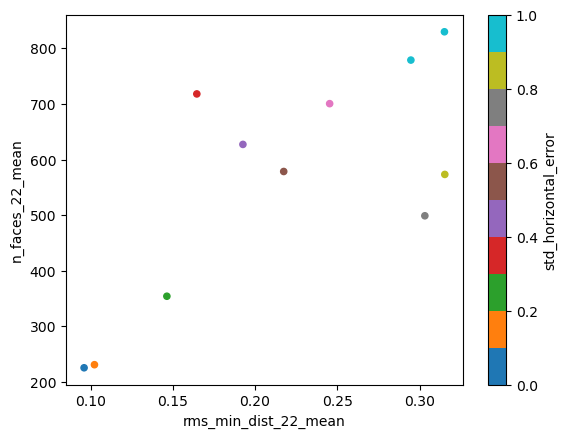

In [16]:
best_optim_scenarios[88:99].plot.scatter("rms_min_dist_22_mean", "n_faces_22_mean", c="std_horizontal_error", colormap="tab10")

<Axes: xlabel='rms_min_dist_22_mean', ylabel='n_faces_22_mean'>

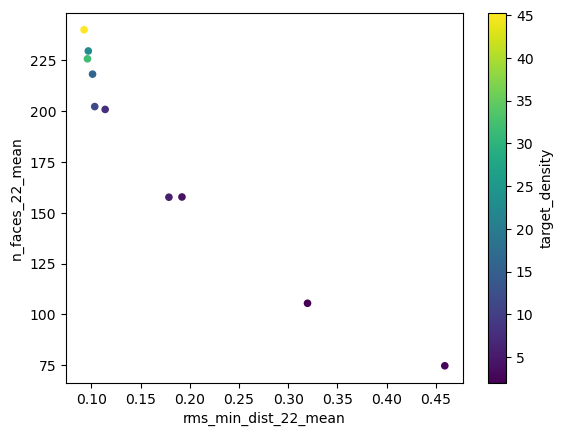

In [19]:
best_optim_scenarios.loc[[i*11+0 for i in range(10)], :].plot.scatter("rms_min_dist_22_mean", "n_faces_22_mean", c="target_density", colormap="viridis")

## Optimization statistics plots

What are the metrics in terms of mean, minimum, maximum, across all optimization scenarios of each point cloud scenario?

In [20]:
opt_results_min = pd.concat(
    [s.describe().loc["min", ["target_density", "std_horizontal_error", *relevant_columns]] for s in ss],
    axis=1,
).transpose()
opt_results_mean = pd.concat(
    [s.describe().loc["mean", ["target_density", "std_horizontal_error", *relevant_columns]] for s in ss],
    axis=1,
).transpose()
opt_results_max = pd.concat(
    [s.describe().loc["max", ["target_density", "std_horizontal_error", *relevant_columns]] for s in ss],
    axis=1,
).transpose()

In [21]:
opt_results_min_rms_dist = pd.concat(
    [ss[i].loc[
         ss[i]["rms_min_dist_22_mean"].idxmin(),
         ["target_density", "std_horizontal_error", *relevant_columns]
     ] for i in range(110)],
    axis=1,
).transpose()
opt_results_min_rms_dist["error_level"] = opt_results_min_rms_dist.std_horizontal_error.apply(lambda x: Decimal(str(np.round(x, decimals=1))))

(array([ 2., 13.,  7., 11., 15., 13.,  8., 13., 10., 12.,  5.,  0.,  0.,
         0.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70.]),
 <BarContainer object of 14 artists>)

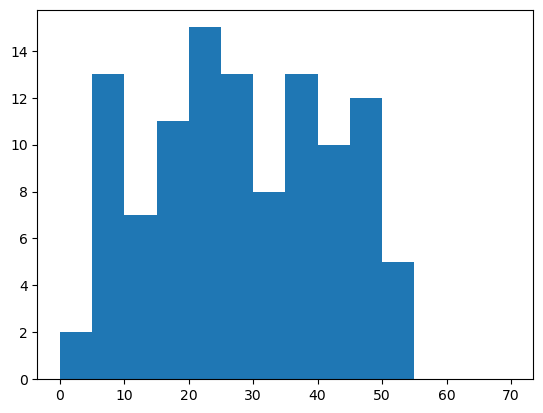

In [63]:
best_optim_scenario_numbers = [int(n[-4:]) for n in opt_results_min_rms_dist.index]
plt.hist(best_optim_scenario_numbers, bins=np.arange(0, 75, 5))

In [43]:
opt_results_mean

target_density  std_horizontal_error  rms_min_dist_22_mean  \
mean        2.000000                   0.0              0.422816   
mean        2.000000                   0.1              0.407327   
mean        2.000000                   0.2              0.425010   
mean        2.000000                   0.3              0.439204   
mean        2.000000                   0.4              0.543756   
...              ...                   ...                   ...   
mean       45.254834                   0.6              0.322226   
mean       45.254834                   0.7              0.290981   
mean       45.254834                   0.8              0.320926   
mean       45.254834                   0.9              0.370584   
mean       45.254834                   1.0              0.393304   

      hausdorff_22_rms  n_faces_22_mean  n_faces_22_abs_diff_mean  \
mean          2.923260       101.893431                 64.859443   
mean          2.830869       102.698321                 66.812613   
mean          2.938133       101.195197                 66.533298   
mean          3.029043        99.879234                 64.667216   
mean          3.374148        73.246703                 40.918761   
...                ...              ...                       ...   
mean          2.041112       853.518274                816.612861   
mean          1.963753       886.764190                849.822000   
mean          2.008013       851.717917                814.737917   
mean          2.200306       832.371889                795.253137   
mean          2.282603       690.248505                653.320398   

      n_faces_22_norm_abs_diff_mean  rank_rms_min_dist_22_mean  \
mean                       2.224821                       26.0   
mean                       2.385436                       26.0   
mean                       2.313698                       26.0   
mean                       2.276807                       26.0   
mean                       1.571889                       26.0   
...                             ...                        ...   
mean                      18.653728                        7.5   
mean                      18.515463                       12.0   
mean                      17.309519                       12.5   
mean                      18.407917                       10.5   
mean                      14.484735                       16.5   

      rank_hausdorff_22_rms  rank_n_faces_22_mean  ...  \
mean                   26.0                  26.0  ...   
mean                   26.0                  26.0  ...   
mean                   26.0                  26.0  ...   
mean                   26.0                  26.0  ...   
mean                   26.0                  26.0  ...   
...                     ...                   ...  ...   
mean                    7.5                   7.5  ...   
mean                   12.0                  12.0  ...   
mean                   12.5                  12.5  ...   
mean                   10.5                  10.5  ...   
mean                   16.5                  16.5  ...   

      rank_n_faces_22_norm_abs_diff_mean  rank_sum  rank_sum_weighted  \
mean                                26.0      26.0               26.0   
mean                                26.0      26.0               26.0   
mean                                26.0      26.0               26.0   
mean                                26.0      26.0               26.0   
mean                                26.0      26.0               26.0   
...                                  ...       ...                ...   
mean                                 7.5      21.0               21.0   
mean                                12.0      21.0               21.0   
mean                                12.5      21.0               21.0   
mean                                10.5      21.0               21.0   
mean                                16.5      21.0               21

In [44]:
for error_lvl in opt_results_mean.std_horizontal_error.unique():
    print(Decimal(str(np.round(error_lvl, decimals=1))))

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
0.7
0.8
0.9
0.1
0.2
0.4


In [22]:
opt_results_mean["error_level"] = opt_results_mean.std_horizontal_error.apply(lambda x: Decimal(str(np.round(x, decimals=1))))
opt_results_min["error_level"] = opt_results_min.std_horizontal_error.apply(lambda x: Decimal(str(np.round(x, decimals=1))))
opt_results_max["error_level"] = opt_results_max.std_horizontal_error.apply(lambda x: Decimal(str(np.round(x, decimals=1))))
best_optim_scenarios["error_level"] = best_optim_scenarios.std_horizontal_error.apply(lambda x: Decimal(str(np.round(x, decimals=1))))

In [46]:
opt_results_mean.error_level.unique()

array([Decimal('0.0'), Decimal('0.1'), Decimal('0.2'), Decimal('0.3'),
       Decimal('0.4'), Decimal('0.5'), Decimal('0.6'), Decimal('0.7'),
       Decimal('0.8'), Decimal('0.9'), Decimal('1.0')], dtype=object)

Text(0.5, 1.0, 'Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings')

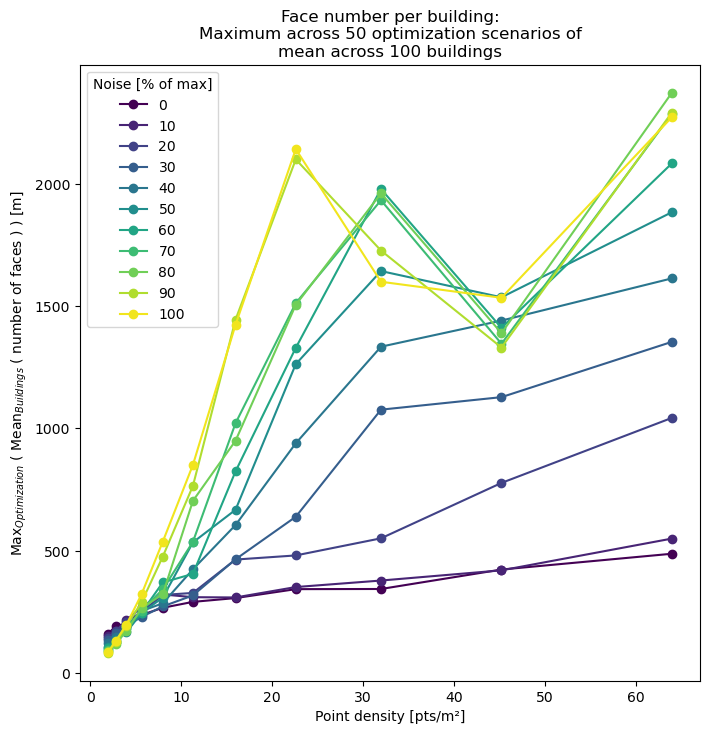

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
cmap = plt.get_cmap("viridis")
for i, error_lvl in enumerate(opt_results_max.error_level.unique()):
    df_slice = opt_results_max[opt_results_max.error_level == error_lvl]
    ax.plot(df_slice["target_density"], df_slice["n_faces_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i * 25))
plt.legend(title="Noise [% of max]")
plt.xlabel("Point density [pts/m²]")
plt.ylabel("Max$_{Optimization}$ ( Mean$_{Buildings}$ ( number of faces ) ) [m]")
plt.title("Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings")
    # opt_results_mean[opt_results_mean.std_horizontal_error == d].plot("target_density", "n_faces_22_mean")

Text(0.5, 1.0, 'Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings')

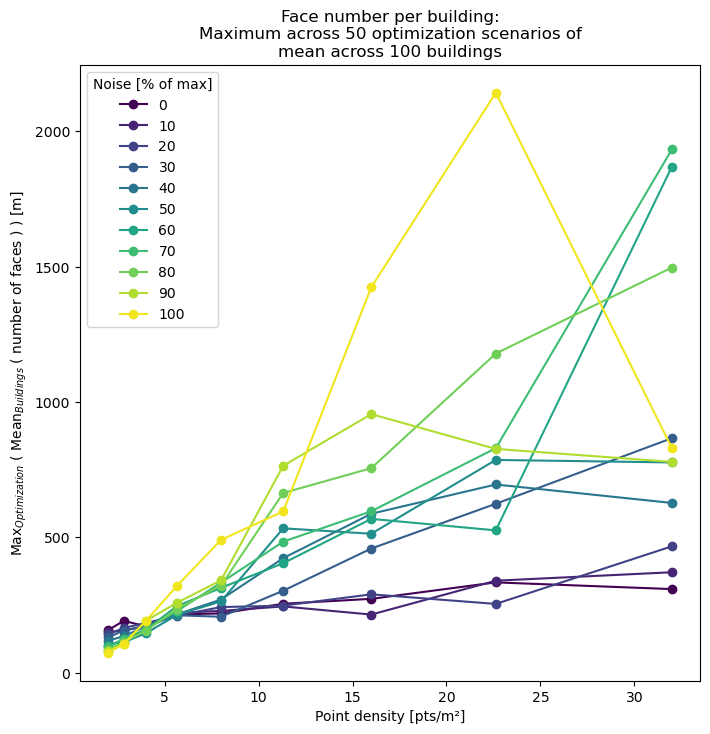

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
cmap = plt.get_cmap("viridis")
for i, error_lvl in enumerate(opt_results_min_rms_dist.error_level.unique()):
    df_slice = opt_results_min_rms_dist[(opt_results_min_rms_dist.error_level == error_lvl) & (opt_results_min_rms_dist.target_density < 33)]
    ax.plot(df_slice["target_density"], df_slice["n_faces_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i * 25))
plt.legend(title="Noise [% of max]")
plt.xlabel("Point density [pts/m²]")
plt.ylabel("Max$_{Optimization}$ ( Mean$_{Buildings}$ ( number of faces ) ) [m]")
plt.title("Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings")
    # opt_results_mean[opt_results_mean.std_horizontal_error == d].plot("target_density", "n_faces_22_mean")

Text(0.5, 1.0, 'RMS minimum distance:\nMinimum across 50 optimization scenarios of\nmean across 100 buildings')

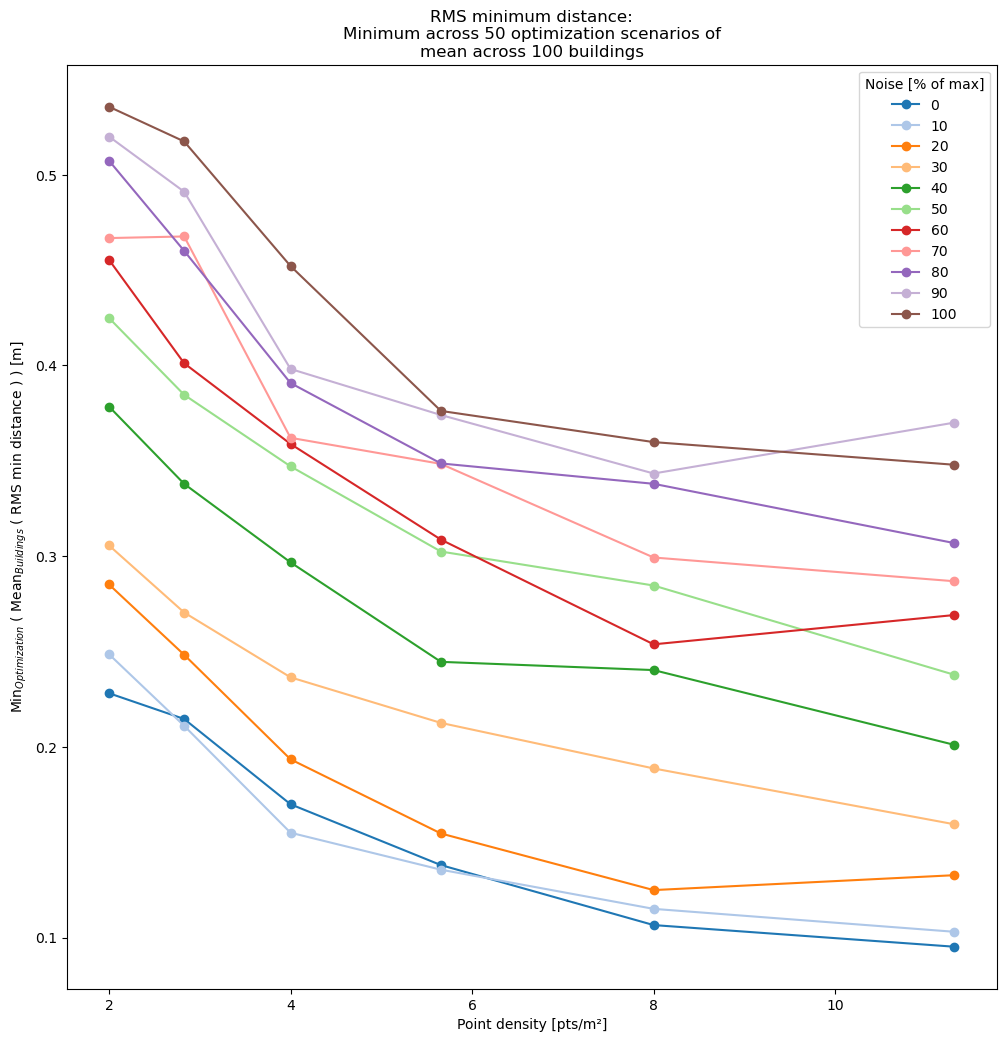

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
cmap = plt.get_cmap("tab20")
for i, error_lvl in enumerate(opt_results_min_rms_dist.error_level.unique()):
    df_slice = opt_results_min_rms_dist[(opt_results_min_rms_dist.error_level == error_lvl) & (opt_results_min_rms_dist.target_density < 15)]
    ax.plot(df_slice["target_density"], df_slice["rms_min_dist_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i))
plt.legend(title="Noise [% of max]")
plt.xlabel("Point density [pts/m²]")
plt.ylabel("Min$_{Optimization}$ ( Mean$_{Buildings}$ ( RMS min distance ) ) [m]")
plt.title("RMS minimum distance:\nMinimum across 50 optimization scenarios of\nmean across 100 buildings")
    # opt_results_mean[opt_results_mean.std_horizontal_error == d].plot("target_density", "n_faces_22_mean")

### Some related stuff and correlations

Trying to see if the combined RMS min and Hausdorff dist as ranked are more closely correlated to IOU. Turns out, they're not.

In [22]:
s["rank_sum_hausdorff_rmsmindist"] = s[["rank_rms_min_dist_22_mean", "rank_hausdorff_22_rms"]].sum(axis=1).rank()

In [ ]:
s.plot.scatter("rank_sum_hausdorff_rmsmindist", "rank_iou_22_mean")

Correlations between target metrics in terms of their actual values and their ranks.

<Axes: xlabel='rms_min_dist_22_mean', ylabel='n_faces_22_mean'>

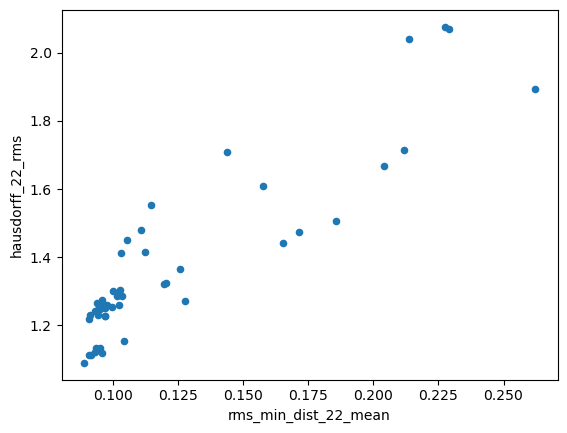

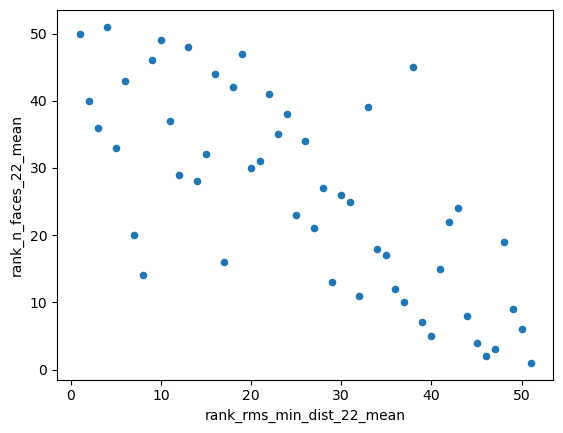

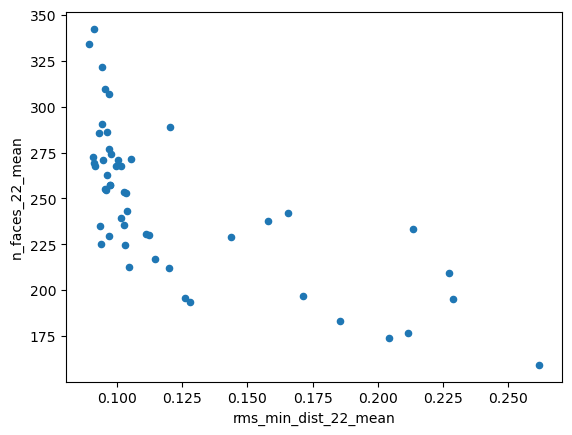

In [168]:
s.plot.scatter("rms_min_dist_22_mean", "hausdorff_22_rms")#,  c="iou_22_mean", colormap="coolwarm")

# s.plot.scatter("rank_rms_min_dist_22_mean", "rank_hausdorff_22_rms",  c="rank_iou_22_mean", colormap="coolwarm")
# s.plot.scatter("rank_rms_min_dist_22_mean", "rank_iou_22_mean",  c="rank_hausdorff_22_rms", colormap="coolwarm")
# s.plot.scatter("rank_hausdorff_22_rms", "rank_iou_22_mean",  c="rank_rms_min_dist_22_mean", colormap="coolwarm")

s.plot.scatter("rank_rms_min_dist_22_mean", "rank_n_faces_22_mean")
s.plot.scatter("rms_min_dist_22_mean", "n_faces_22_mean")
# s.plot.scatter("rank_iou_22_mean", "rank_n_faces_22_mean")

Same, but only looking at the best scenarios in terms of the range threshold.

<Axes: xlabel='n_faces_22_mean', ylabel='rms_min_dist_22_mean'>

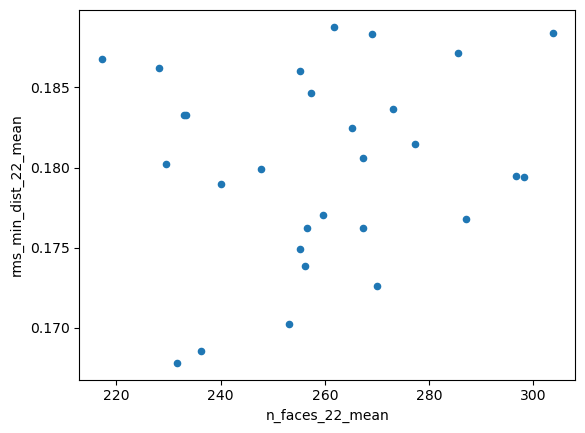

In [60]:
s[s.rms_min_dist_22_mean < (s.rms_min_dist_22_mean.min() + threshold_ratio*(s.rms_min_dist_22_mean.max() - s.rms_min_dist_22_mean.min()))].loc[:, ["rms_min_dist_22_mean", "n_faces_22_mean"]].plot.scatter("n_faces_22_mean", "rms_min_dist_22_mean")

## Face number distribution

Looking more closely at the distribution of the number of faces, and the scenarios with the least number of faces on average

In [28]:
s[s.n_faces_22_mean < s.n_faces_22_mean.quantile(q=0.1)].loc[:, relevant_columns]

rms_min_dist_22_mean  n_faces_22_mean  iou_22_mean  \
name                                                             
optim_0007              0.460332       117.101010     0.897737   
optim_0019              0.405446       101.979798     0.902791   
optim_0021              0.462593       113.353535     0.904272   
optim_0034              0.265557       163.656566     0.931518   
optim_0037              0.450904       101.808081     0.893522   

            rank_rms_min_dist_22_mean  rank_n_faces_22_mean  rank_iou_22_mean  \
name                                                                            
optim_0007                       49.0                   4.0              19.0   
optim_0019                       47.0                   2.0              18.0   
optim_0021                       50.0                   3.0              17.0   
optim_0034                       43.0                   5.0              13.0   
optim_0037                       48.0                   1.0              20.0   

            rank_sum  rank_sum_weighted  rangerank_rms_min_dist_22_mean  \
name                                                                      
optim_0007      43.0               26.5                        0.993716   
optim_0019      34.0               15.5                        0.841188   
optim_0021      39.5               22.5                        1.000000   
optim_0034      28.5               14.0                        0.452434   
optim_0037      37.0               18.0                        0.967516   

            rangerank_n_faces_22_mean  rangerank_iou_22_mean  rangerank_sum  \
name                                                                          
optim_0007                   0.073492               0.947381       2.014589   
optim_0019                   0.000825               0.884282       1.726295   
optim_0021                   0.055483               0.865804       1.921287   
optim_0034                   0.297219               0.525685       1.275338   
optim_0037                   0.000000               1.000000       1.967516   

            rangerank_sum_weighted  
name                                
optim_0007                1.566060  
optim_0019                1.295340  
optim_0021                1.482577  
optim_0034                1.179417  
optim_0037                1.475637

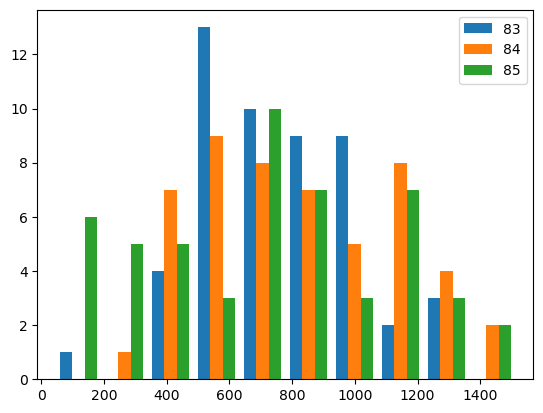

In [21]:
id_first, id_last = 83, 85
scenario_ids = [id_first+i for i in range(0, 1+id_last-id_first)]
plt.hist([s.n_faces_22_mean for s in ss[id_first:(id_last+1)]])
plt.legend(scenario_ids)  # ["55", "56", "58"])
plt.show()

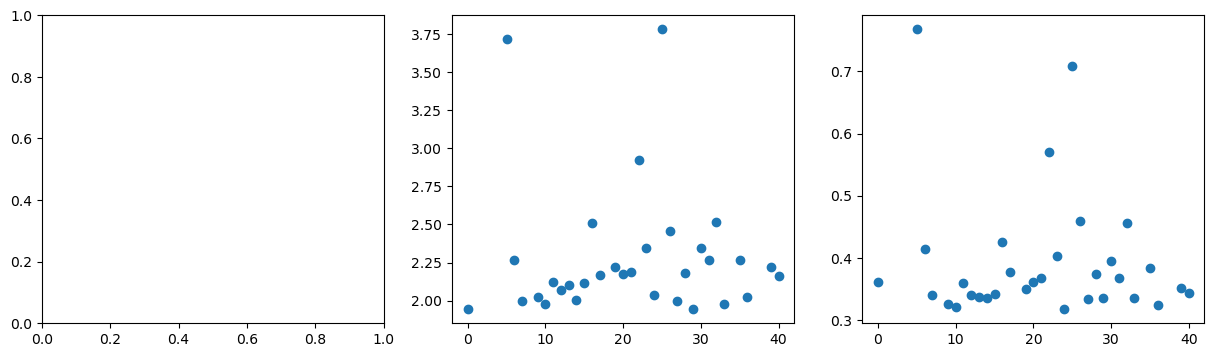

In [24]:
s = ss[109]
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
# ax[0].scatter(range(s.shape[0]), s["iou_22_mean"])
ax[1].scatter(range(s.shape[0]), s["hausdorff_22_rms"])
ax[2].scatter(range(s.shape[0]), s["rms_min_dist_22_mean"])
# plt.legend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.legend(["hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.ylim(.2, 0.95)
plt.show()

## Plotting functions

In [33]:
opt_params = [m.split("_", 1)[1] for m in glb.geoflow_optim_parameter_space_narrow.keys()]

def plot_metric_vs_parameter(es: list[Experiment] | Experiment, target_metric: str):
    if isinstance(es, Experiment):
        es = [es]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(opt_params), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="all", layout="constrained")
    
    for i, opt_param in enumerate(opt_params):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                ax = axs[i, j]
            s.plot.scatter(opt_param, target_metric, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [34]:
def plot_metric_vs_metric(es: list[Experiment] | Experiment, x, ys):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(ys), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="row", sharex="row", layout="constrained")
    
    for i, y in enumerate(ys):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                if nrows == 1:
                    ax = axs[j]
                else:
                    ax = axs[i, j]
            s.plot.scatter(x, y, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [28]:
def plot_metric_vs_metric_2(es: list[Experiment] | Experiment, xs, ys, sharex=None, sharey="row", **kwargs):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(xs, str):
        xs = [xs]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    n_dependents = len(ys)
    n_independents = len(xs)
    nrows, ncols = n_independents * n_dependents, len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharex=sharex, sharey=sharey, layout="constrained")
    
    for h, x in enumerate(xs):
        for i, y in enumerate(ys):
            for j, s in enumerate(stats):
                if ncols == 1:
                    if nrows == 1:
                        ax = axs
                    else:
                        ax = axs[(h * n_dependents) + i]
                else:
                    if nrows == 1:
                        ax = axs[j]
                    else:
                        ax = axs[(h * n_dependents) + i, j]
                s.plot.scatter(x, y, ax=ax, **kwargs)
                if (h + i) == 0:
                    ax.set_title(es[j].name)
                # if (i + 1) == len(ys):
                #     ax.tick_params(axis="both", reset=True)
        
    plt.show()

In [ ]:
plot_metric_vs_parameter(eos, "rms_min_dist_22_mean")

In [36]:
# Create a column that indicates the scenarios that are not worse by more than a certain amount than the best target metric value
for i in range(len(ss)):
    ss[i]["best_pct"] = (ss[i]["rms_min_dist_22_mean"] <= 1.15 * ss[i]["rms_min_dist_22_mean"].min()).astype(int)

In [37]:
for i in range(len(ss)):
    ss[i]["best_pct_or_best"] = ss[i]["best_pct"]
    ss[i].loc[ss[i]["is_best"] == 1, "best_pct_or_best"] = 2

In [34]:
# Function to check Pareto-optimality for maximization
# def is_pareto_optimal(df):
#     values = df.values
#     pareto_mask = np.ones(values.shape[0], dtype=bool)  # Initialize as all True
# 
#     for i, row in enumerate(values):
#         # Check if the current row is dominated by any other row
#         pareto_mask[i] = not np.any(np.all(values >= row, axis=1) & np.any(values > row, axis=1))
# 
#     return pareto_mask

# Function to check Pareto-optimality for minimization
def is_pareto_optimal_min(df):
    values = df.values
    pareto_mask = np.ones(values.shape[0], dtype=bool)  # Initialize all as True

    for i, row in enumerate(values):
        # For minimization, we check if there exists any row with values <= current row
        pareto_mask[i] = not np.any(np.all(values <= row, axis=1) & np.any(values < row, axis=1))

    return pareto_mask

# Compute Pareto-optimal mask and add it as a new column to the DataFrame
# df['pareto_optimal'] = is_pareto_optimal(df[['metric1', 'metric2']])

for i in range(len(ss)):
    ss[i]["pareto_optimal"] = is_pareto_optimal_min(ss[i][["rms_min_dist_22_mean", "n_faces_22_mean"]]).astype(int)

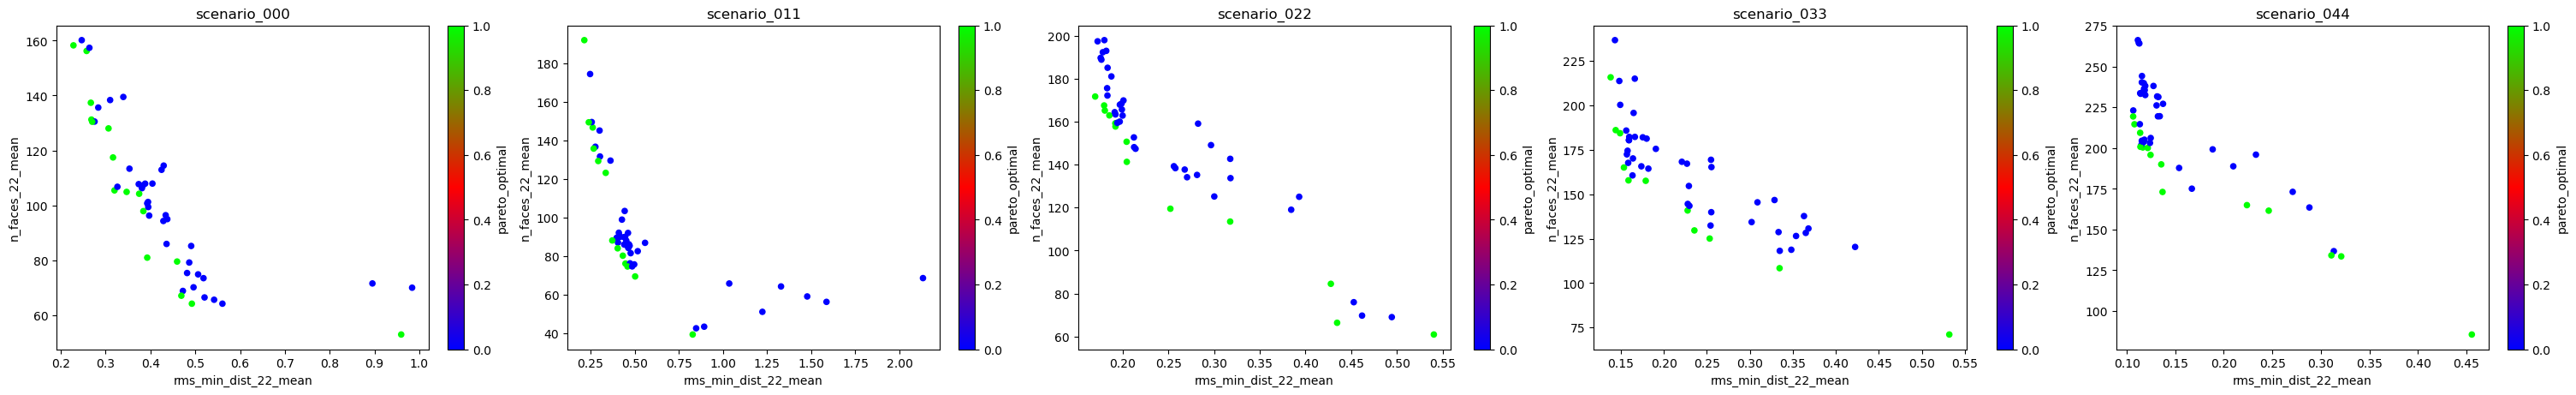

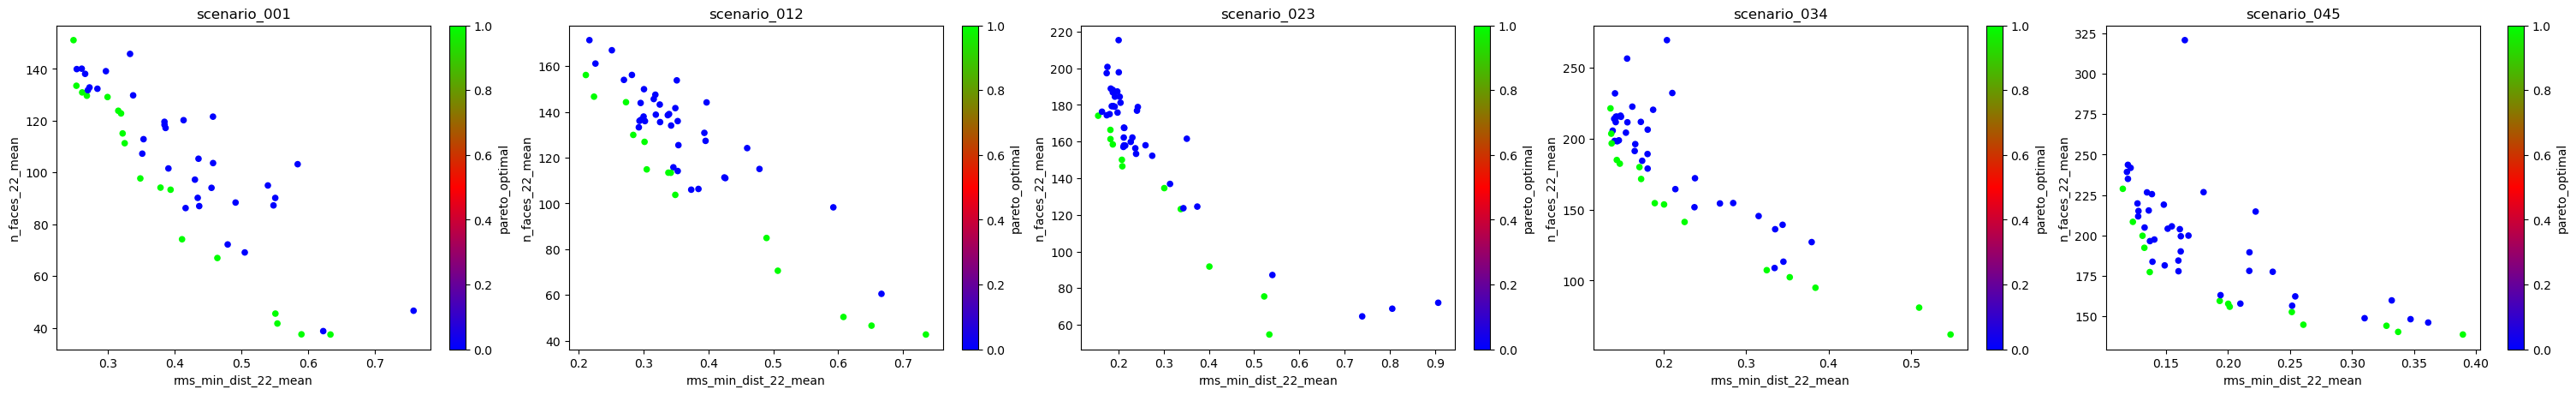

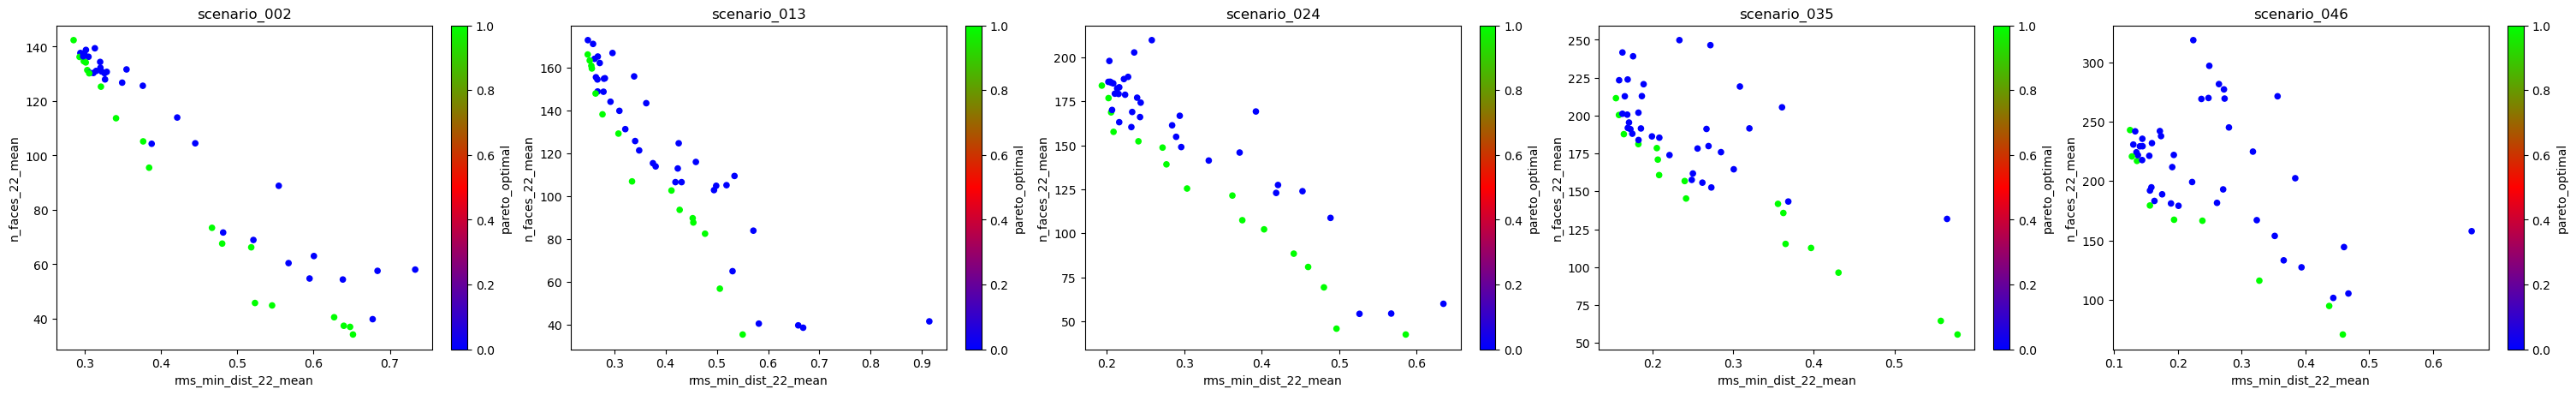

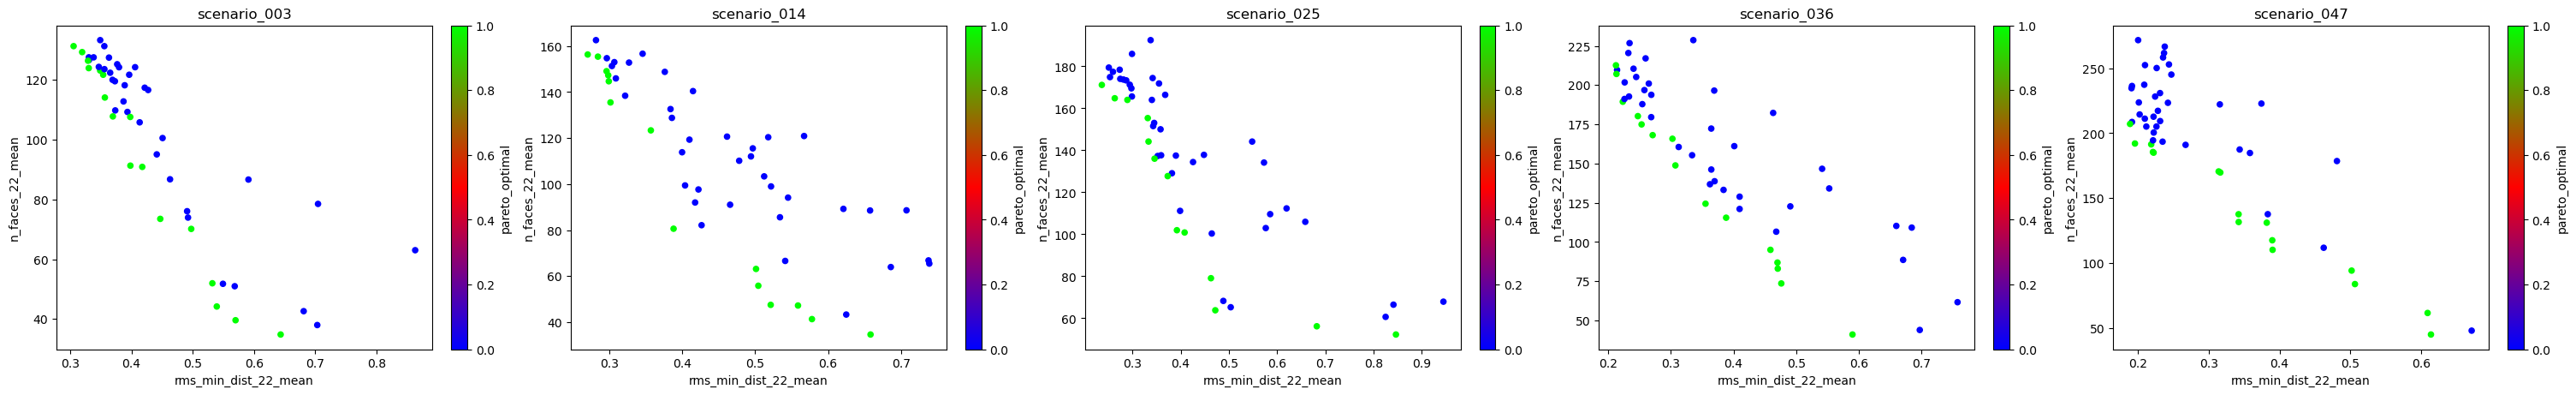

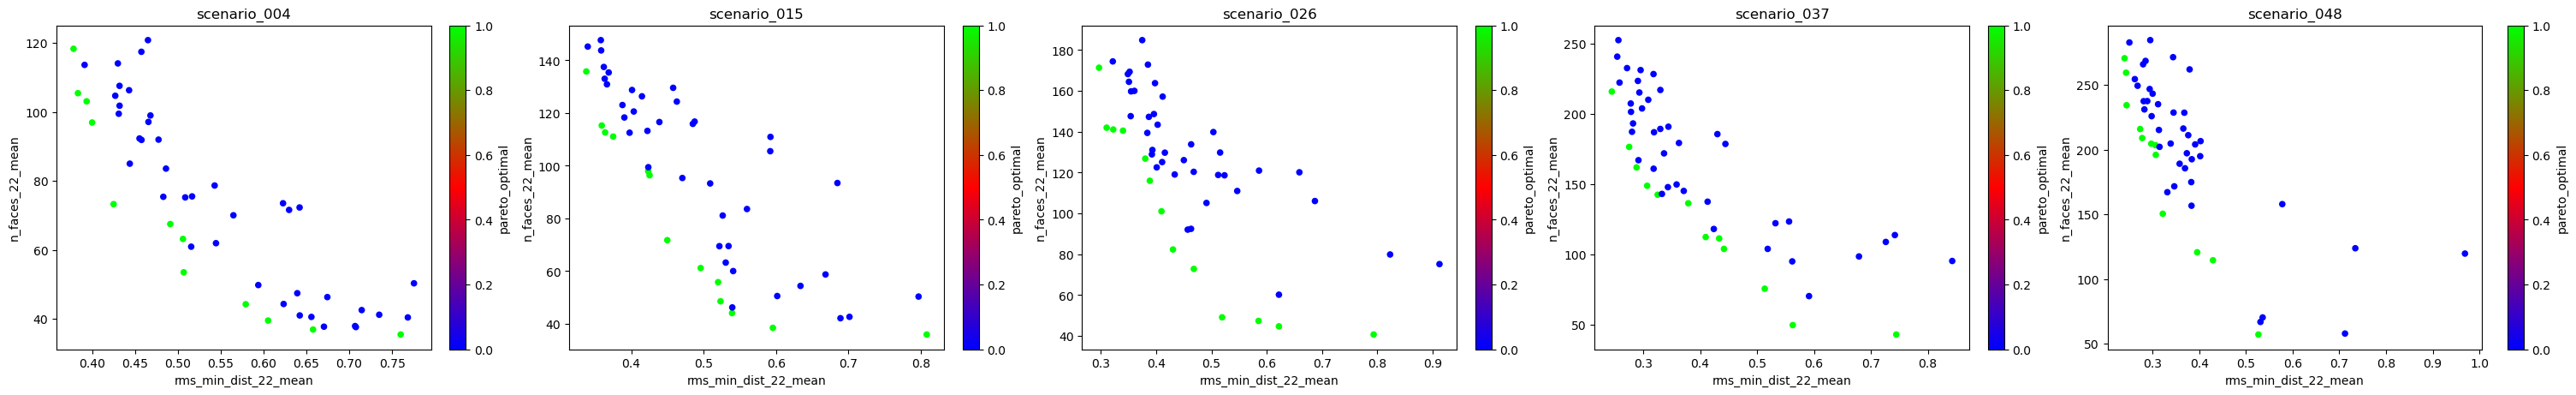

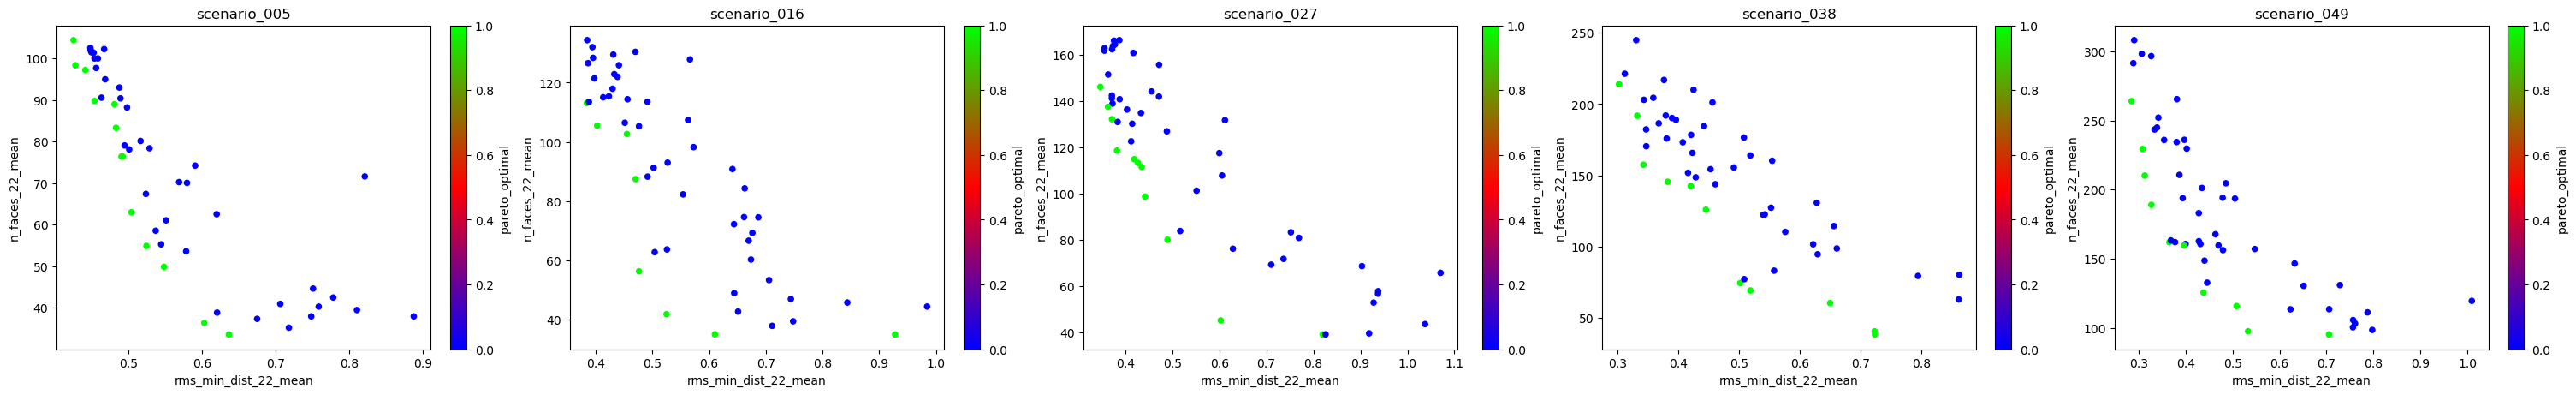

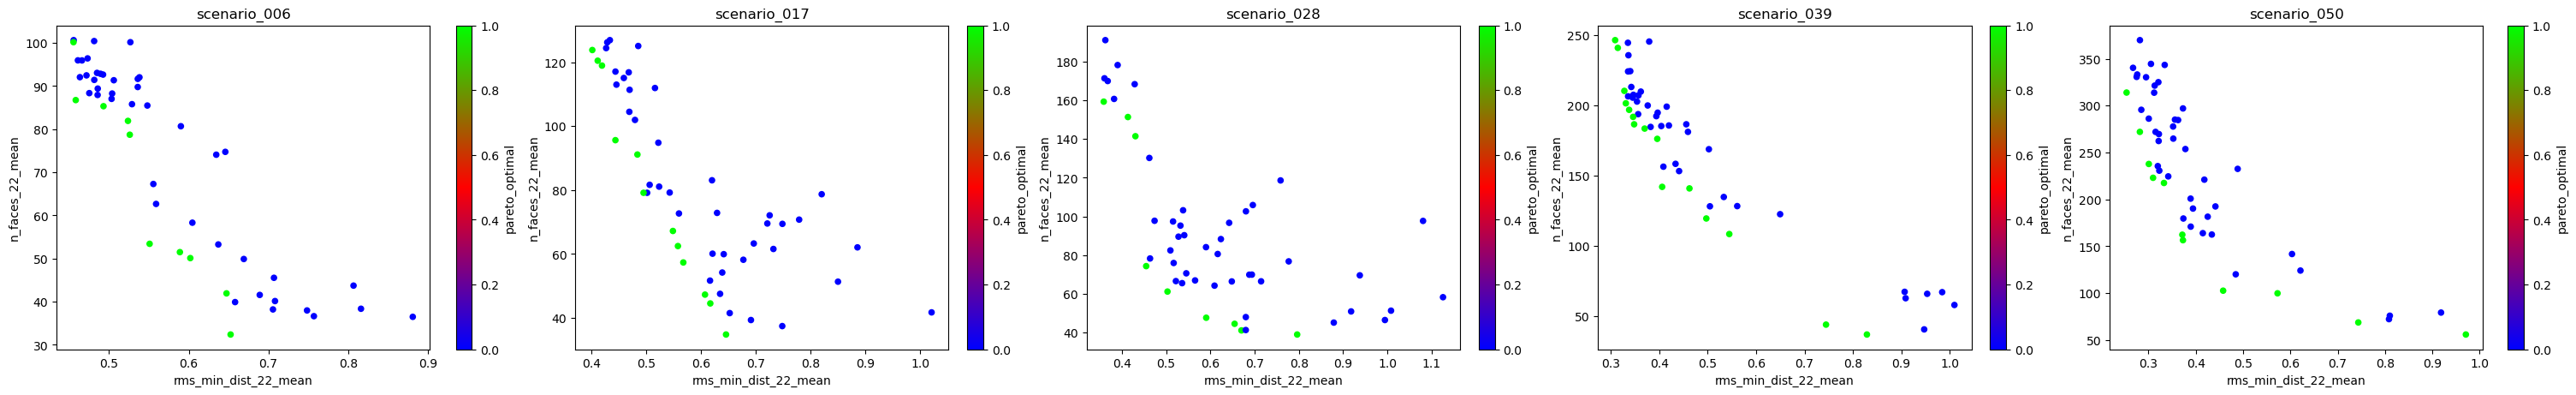

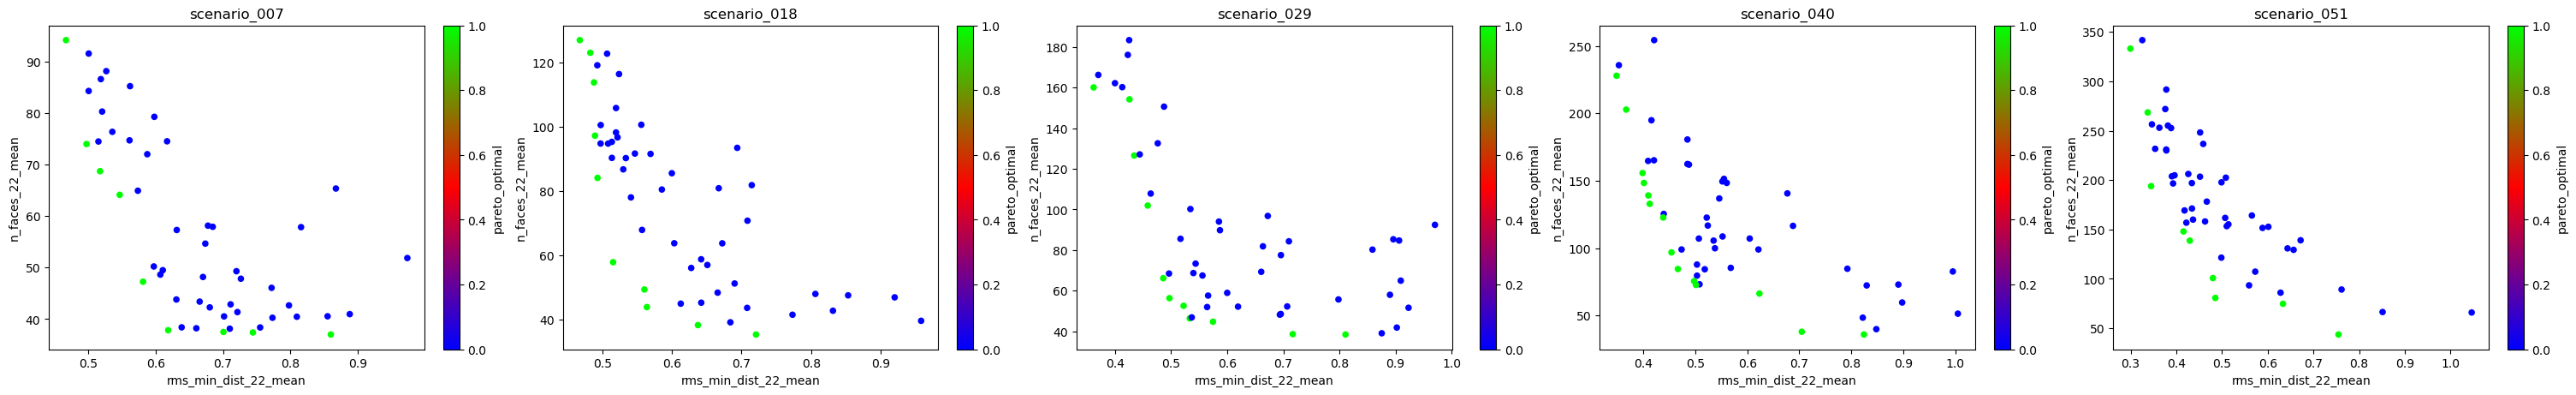

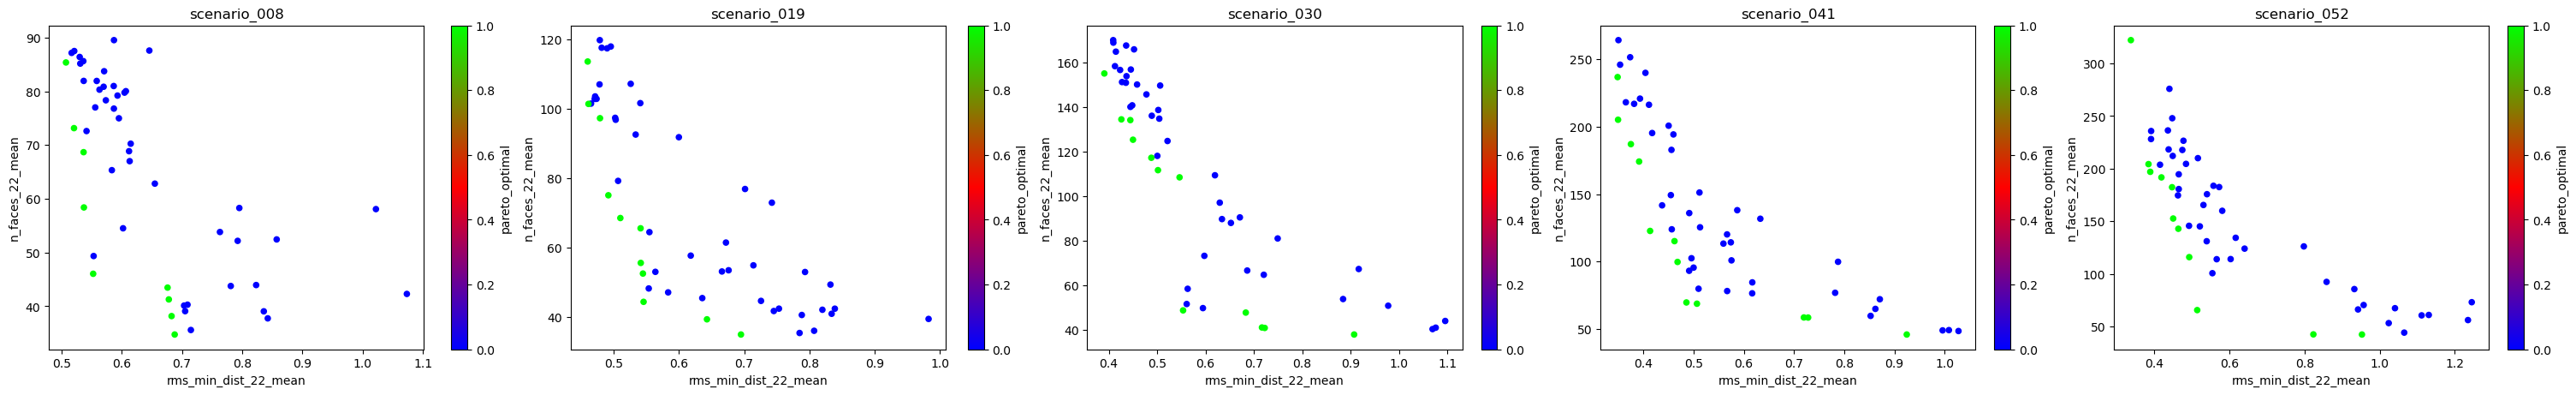

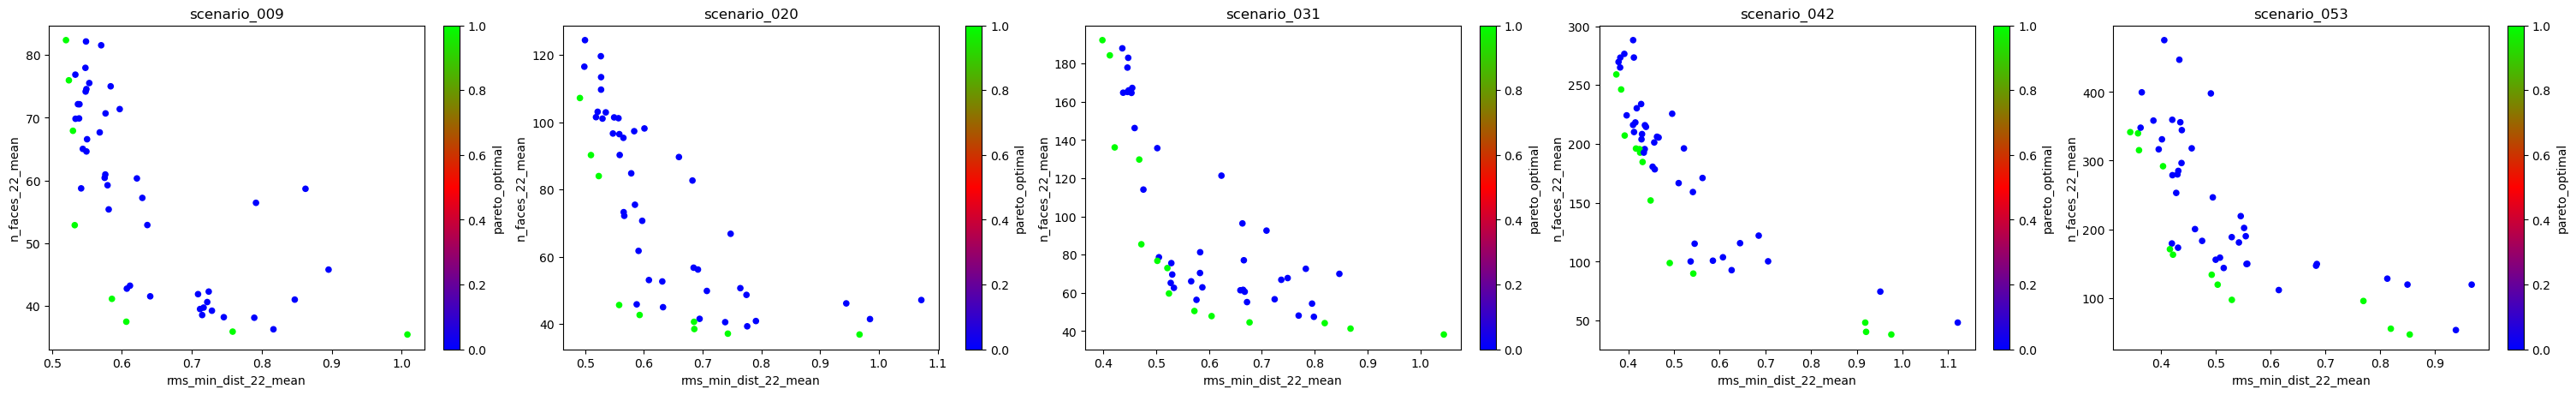

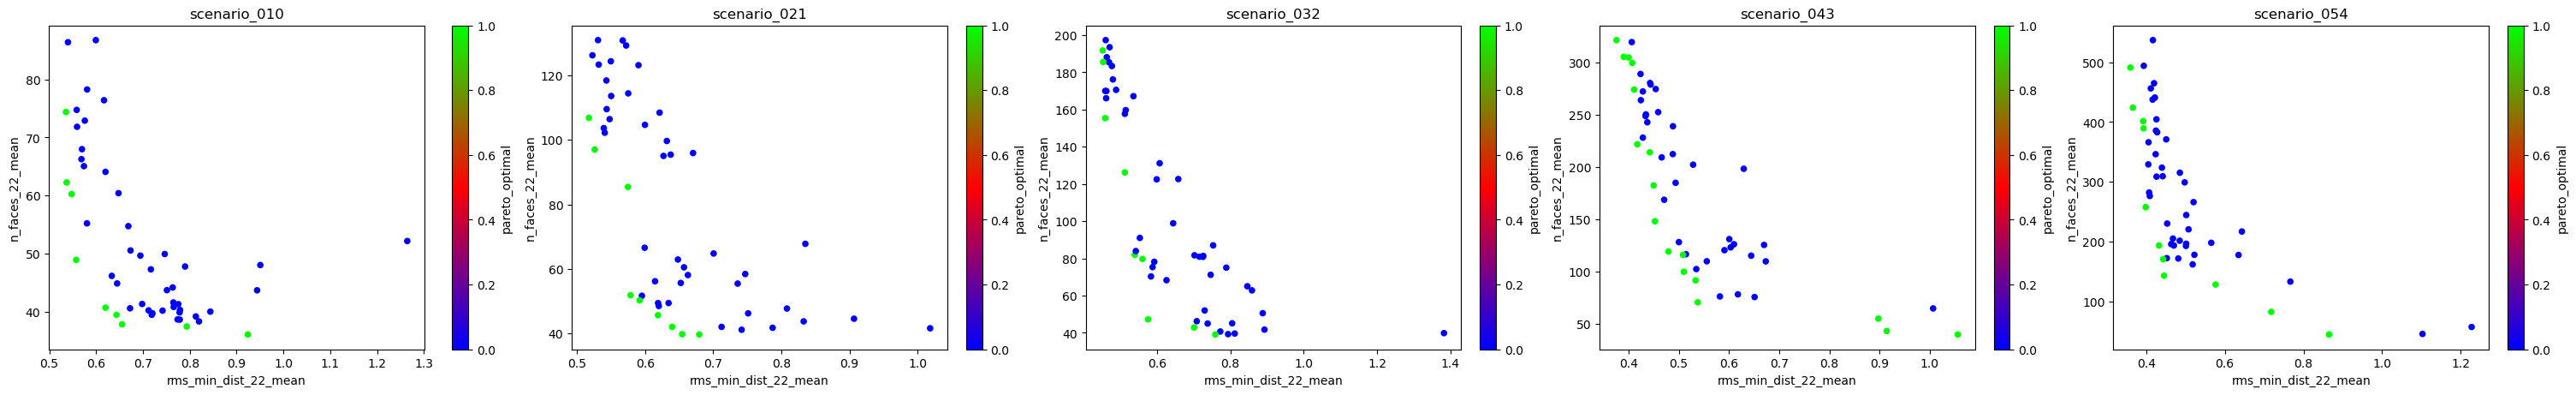

In [35]:
rows_error_levels = range(0, 11)
cols_density_levels = range(0, 5)
for i in rows_error_levels:
    plot_metric_vs_metric_2([eos[j*11 + i] for j in cols_density_levels], ["rms_min_dist_22_mean"], ["n_faces_22_mean"], c="pareto_optimal", colormap="brg", sharex=None, sharey=None)

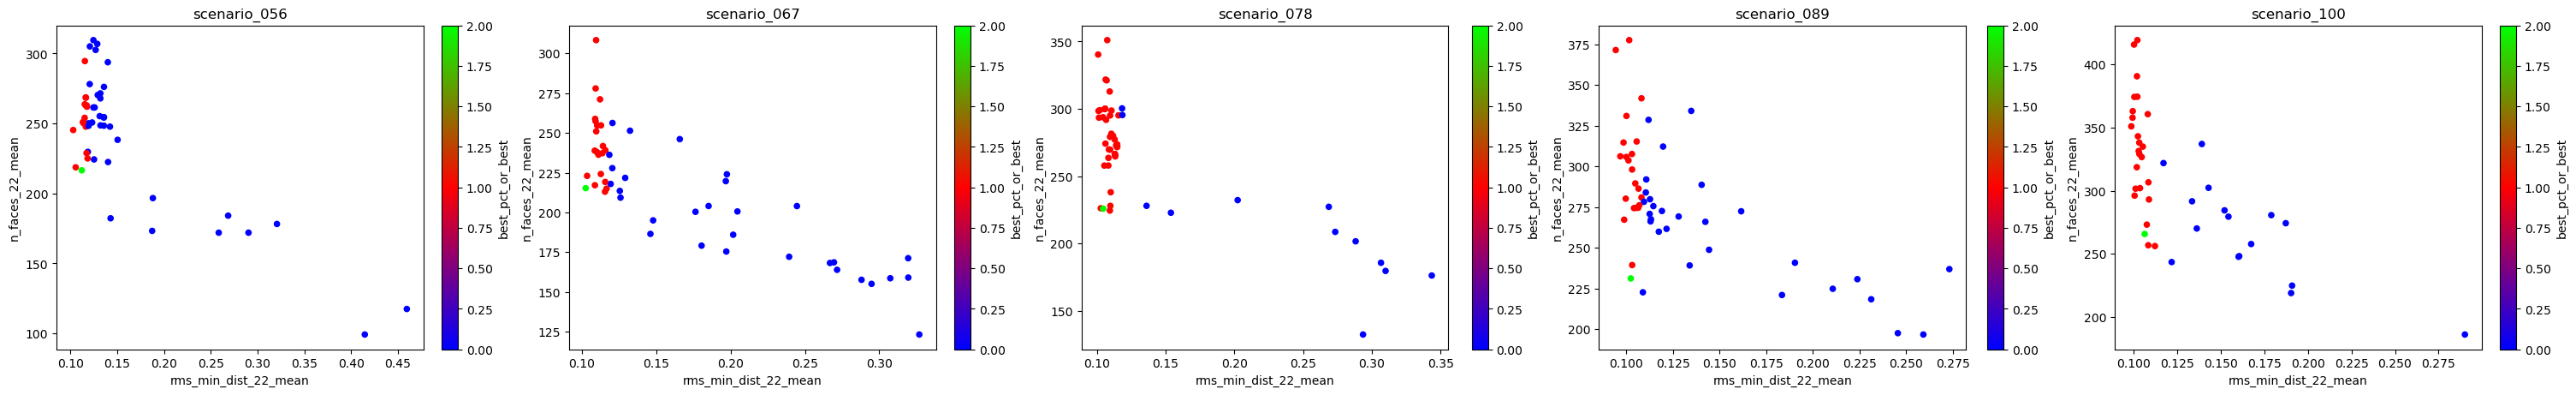

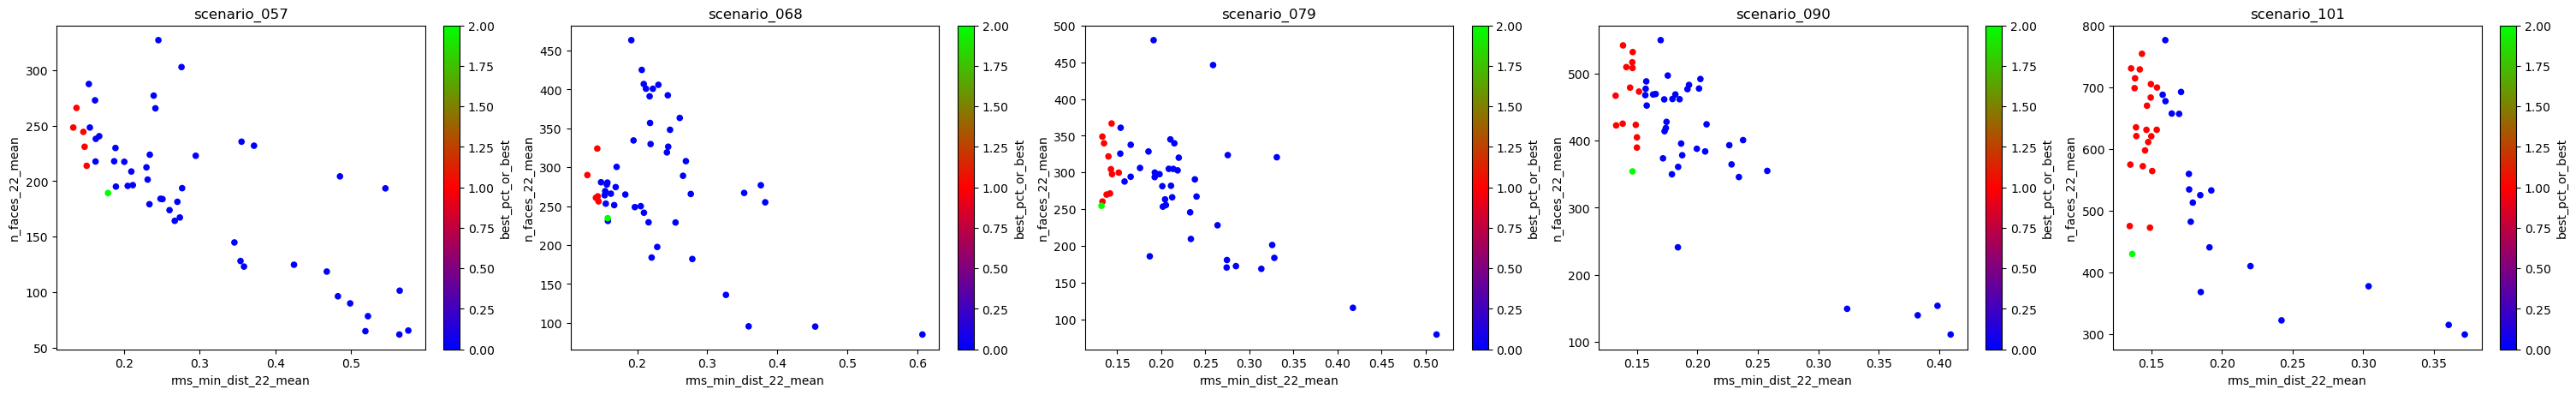

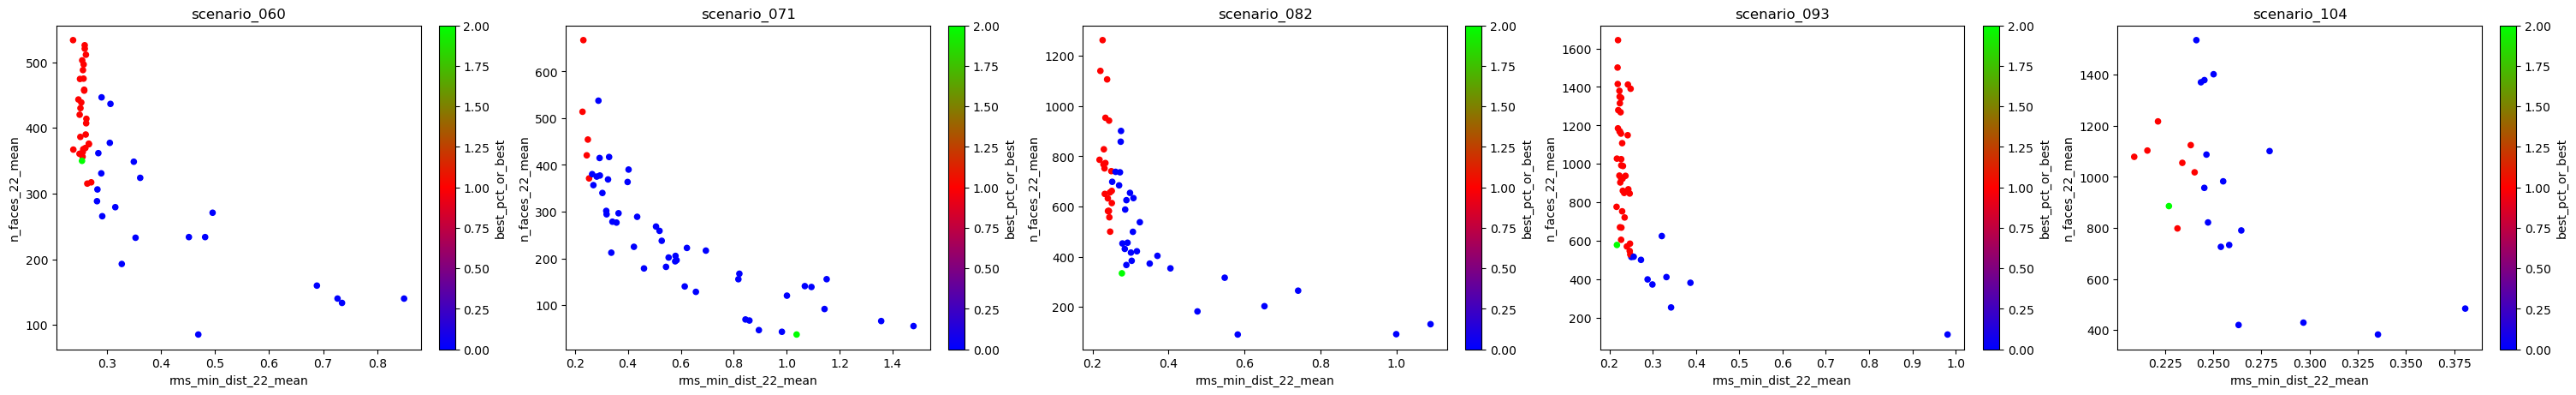

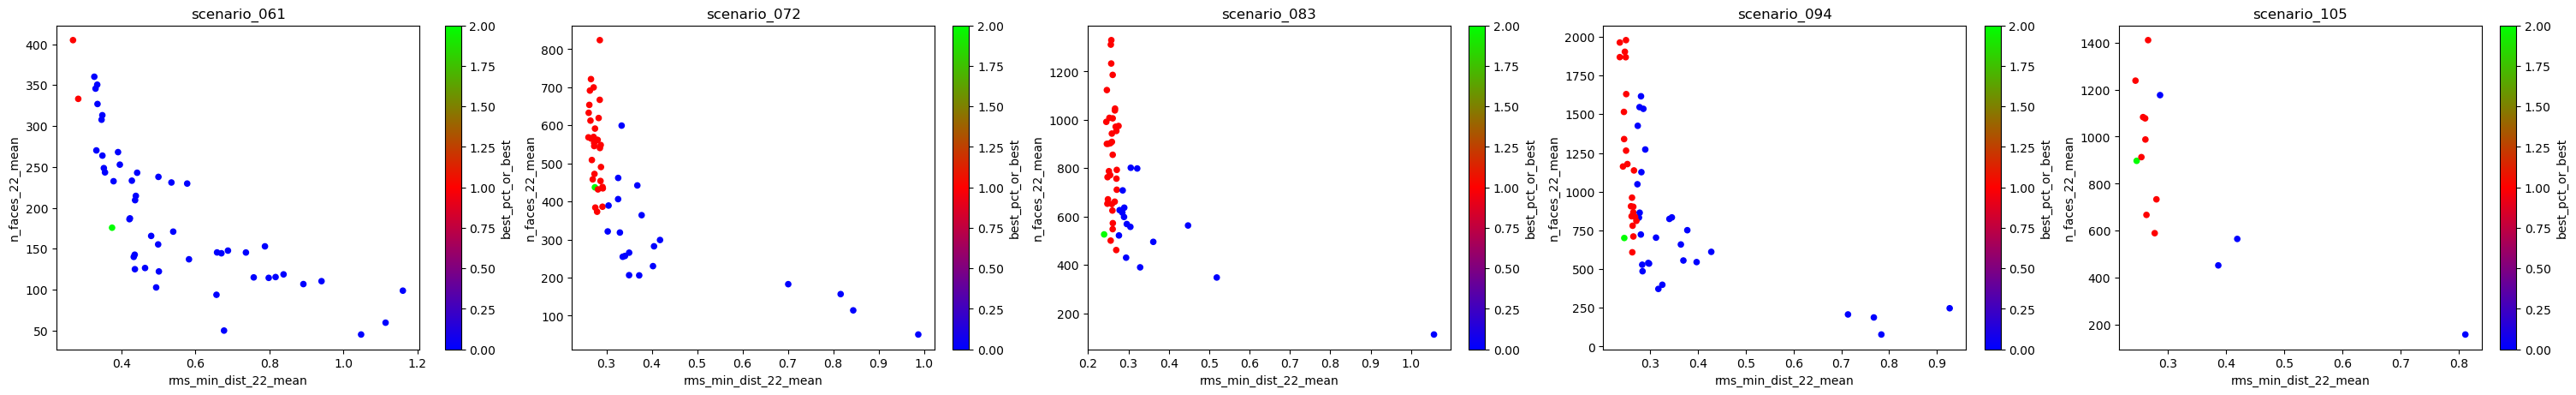

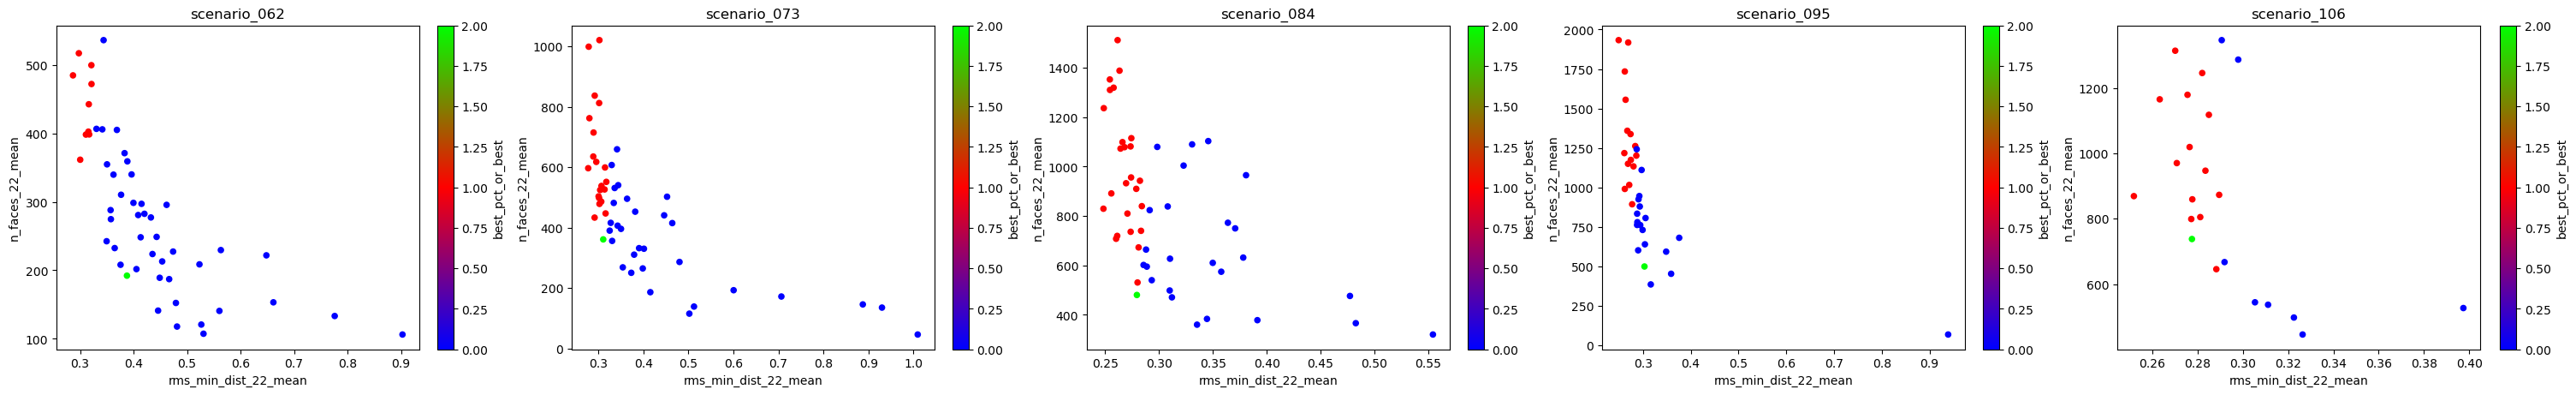

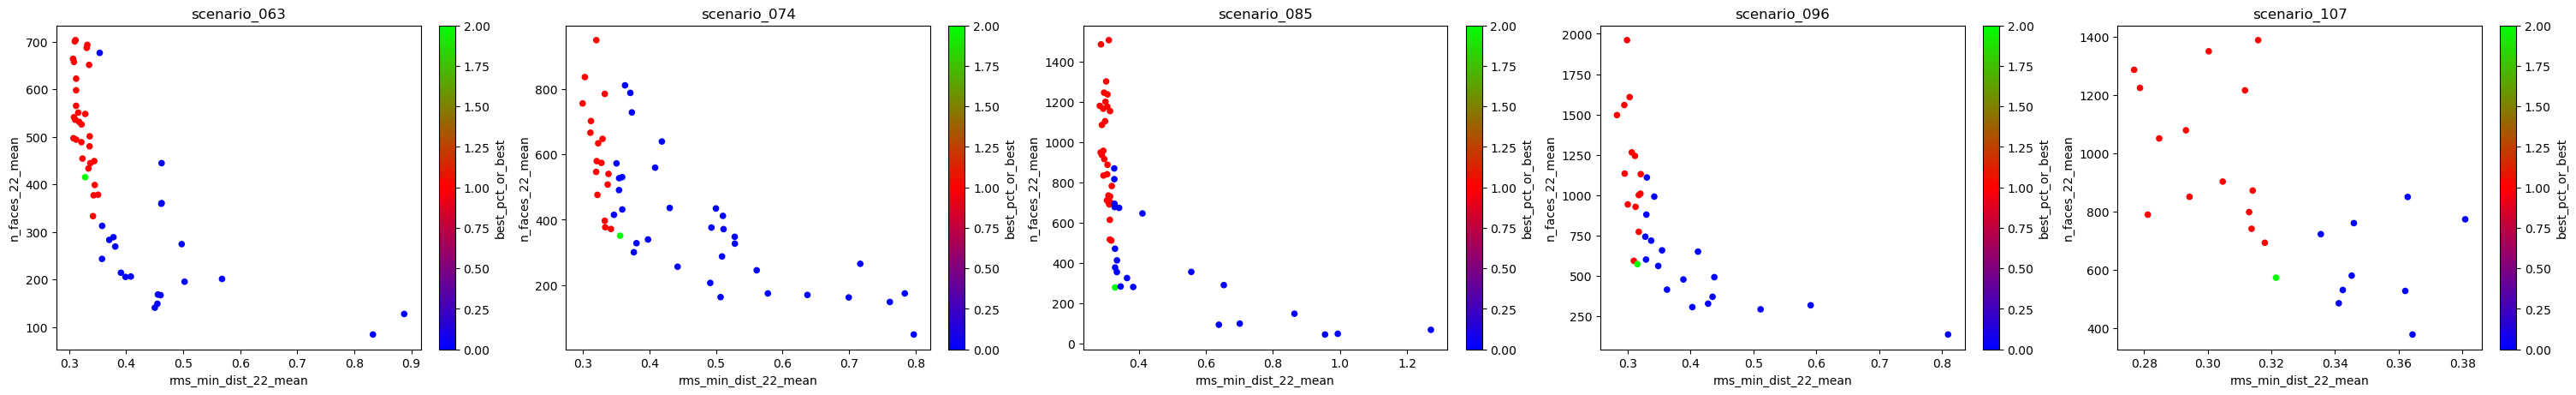

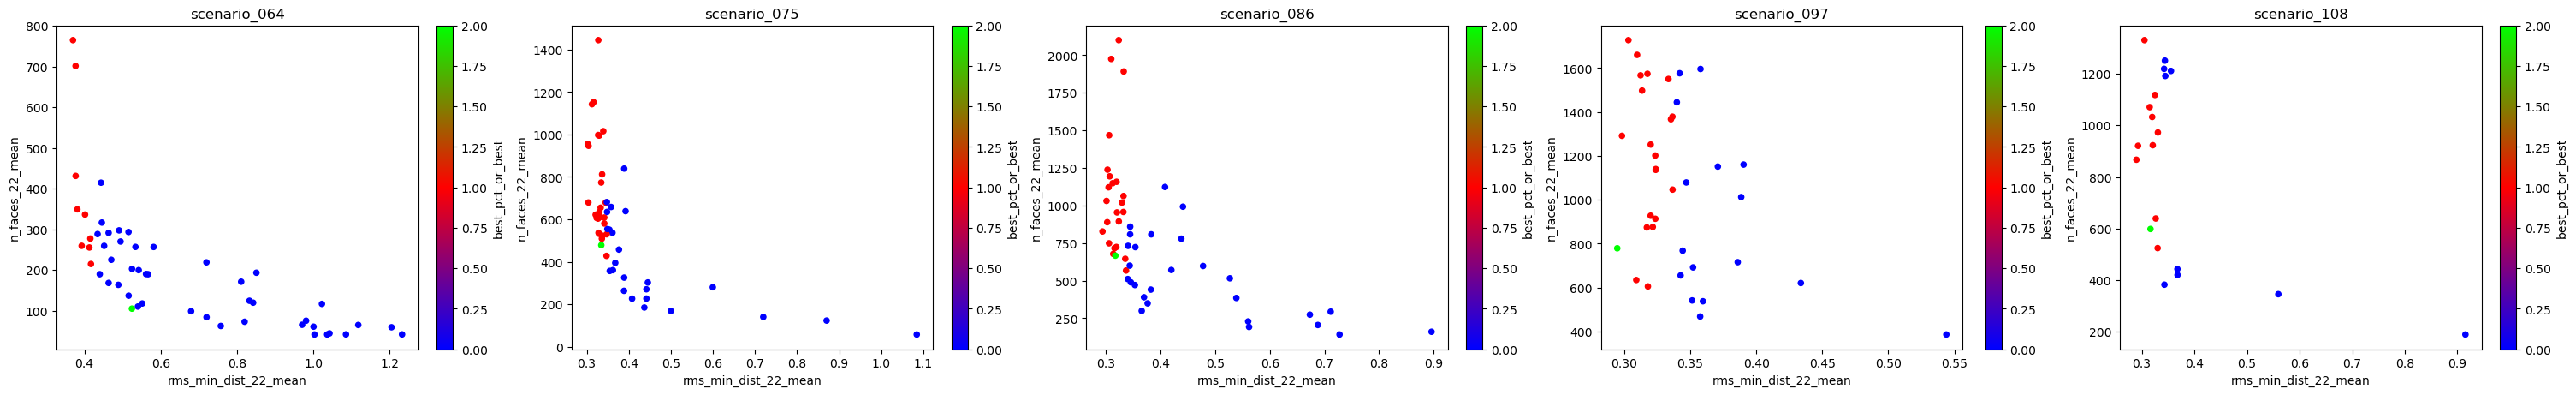

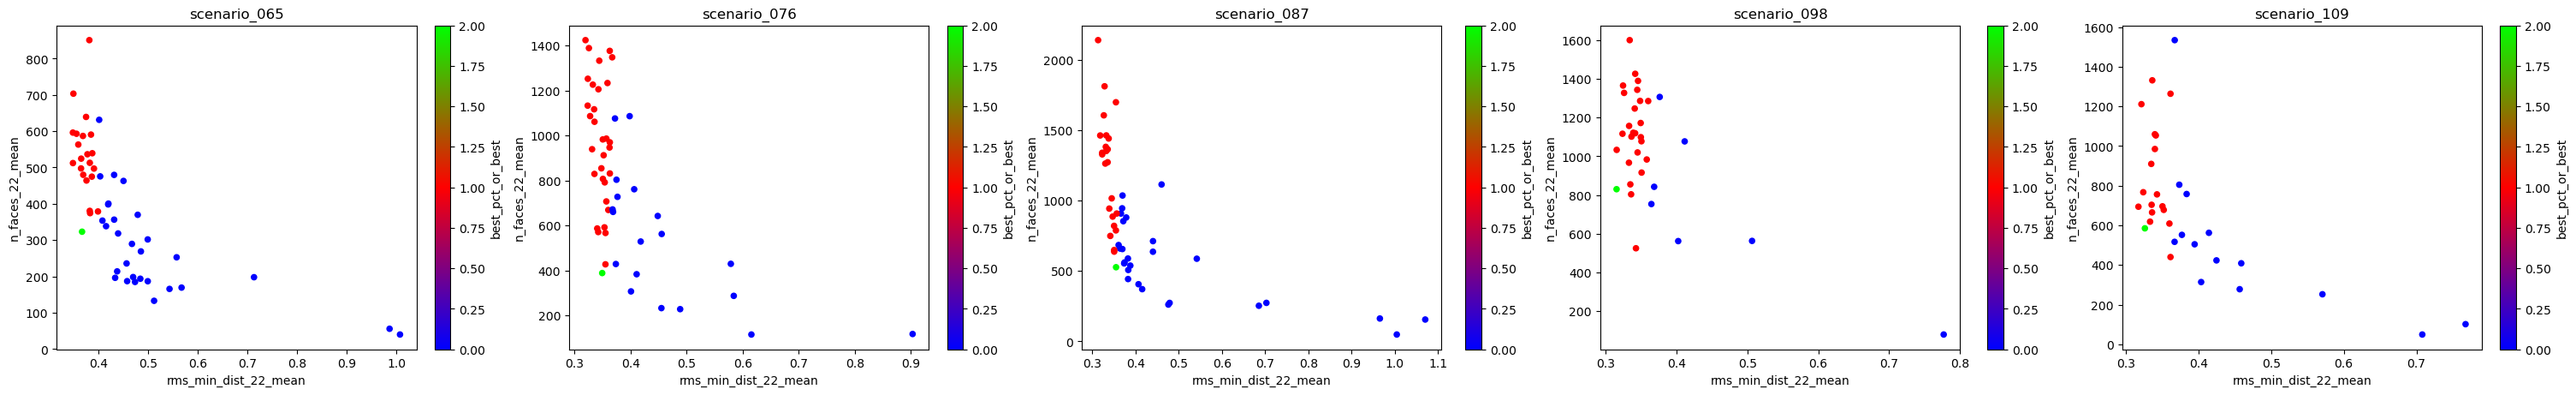

In [40]:
rows_error_levels = range(0, 11)
cols_density_levels = range(5, 10)
for i in rows_error_levels:
    plot_metric_vs_metric_2([eos[j*11 + i] for j in cols_density_levels], ["rms_min_dist_22_mean"], ["n_faces_22_mean"], c="best_pct_or_best", colormap="brg", sharex=None, sharey=None)

In [35]:
plot_metric_vs_metric_2(eos, opt_params, "rms_min_dist_22_mean", c="n_faces_22_mean", colormap="coolwarm")

In [ ]:
plot_metric_vs_metric_2(eo, opt_params, ["rms_min_dist_22_mean", "n_faces_22_mean"])

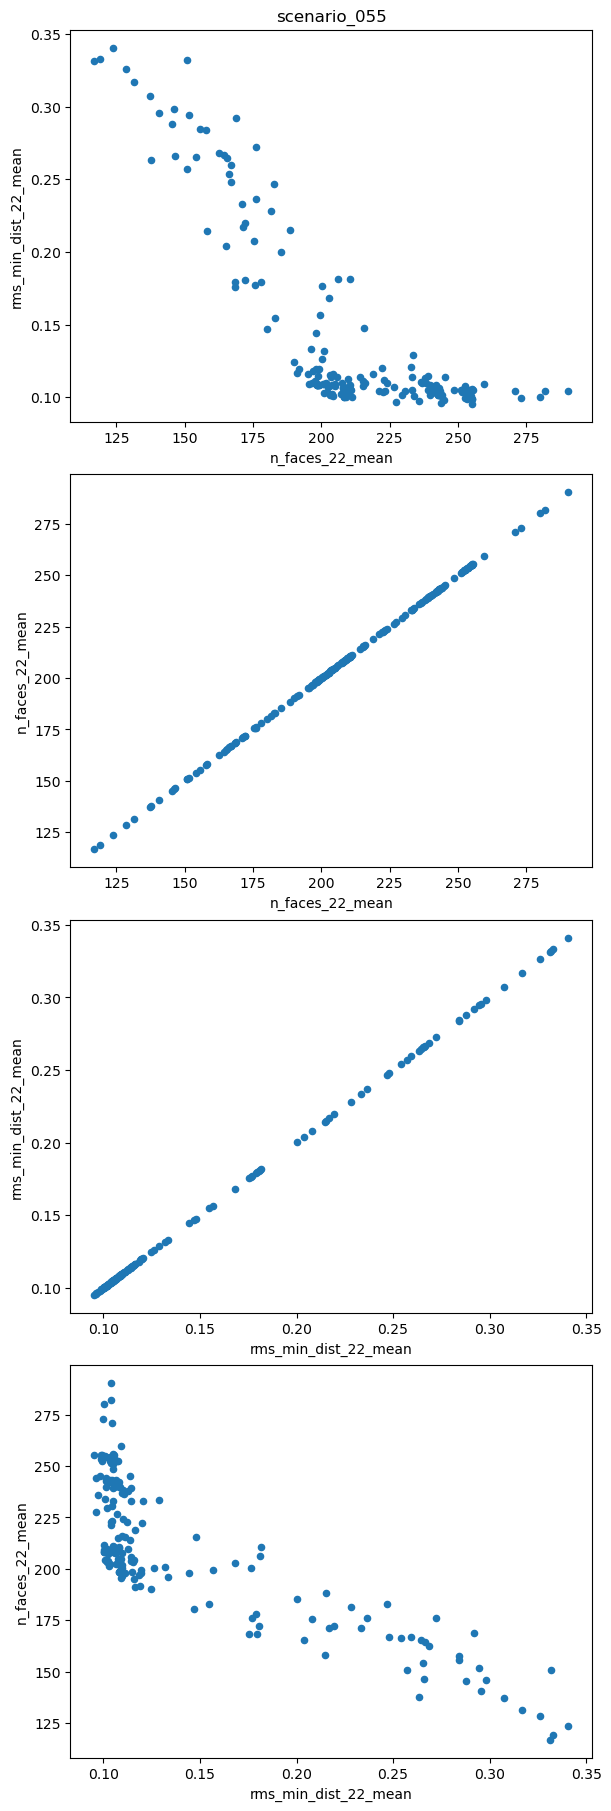

In [52]:
plot_metric_vs_metric_2(eo, ["n_faces_22_mean", "rms_min_dist_22_mean"], ["rms_min_dist_22_mean", "n_faces_22_mean"])

# Check reconstruction optimization for one scenario

## Load experiment, get summary stats

In [5]:
eos = [Experiment.load(e[si].recon_optim_output_dirpath, load_scenarios=True) for si in [55, 58]]

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...


In [6]:
eo = Experiment.load(e[55].recon_optim_output_dirpath, load_scenarios=True)

In [7]:
eo.run_steps(Scenario.setup_evaluation, lods=["2.2"])


Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.026596.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.014973.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.011025.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.013009.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.014969.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.015001.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.014013.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.015510.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after

In [11]:
# run additional evaluators if it was not done yet
# eo.run_steps(Scenario.run_evaluation, evaluator_selection=["complexity", "geoflow_output"])


Running 'run_evaluation' for optim_0000 ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.051979.

Starting ComplexityEvaluator ...
Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:00.060388.

Starting GeoflowOutputEvaluator ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.050008.

Starting CityJSONBuildingsEvaluator ...

Finished CityJSONBuildingsEvaluator after 0:00:00.472741.

Starting WavefrontOBJBuildingsEvaluator ...

Finished WavefrontOBJBuildingsEvaluator after 0:00:00.264102.

Finished GeoflowOutputEvaluator after 0:00:00.790848.

Finished 'run_evaluation' for optim_0000 after 0:00:00.905239.

Running 'run_evaluation' for optim_0001 ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.061012.

Starting ComplexityEvaluator ...
Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:00.047011.


In [8]:
eo.compute_summary_statistics(evaluator_selection=["hausdorff", "complexity", "iou_3d", "geoflow_output"])

Computing summary statistics from all scenarios ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.161126.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.057001.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.072007.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.062533.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.064549.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.075526.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.080529.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.074549.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.061985.

Starting Ge

In [12]:
s = eo.summary_stats
s

target_density  pulse_freq_hz  scan_freq_hz  point_spacing_along  \
name                                                                           
optim_0000       11.313708         534044           202              0.29703   
optim_0001       11.313708         534044           202              0.29703   
optim_0002       11.313708         534044           202              0.29703   
optim_0003       11.313708         534044           202              0.29703   
optim_0004       11.313708         534044           202              0.29703   
...                    ...            ...           ...                  ...   
optim_0196       11.313708         534044           202              0.29703   
optim_0197       11.313708         534044           202              0.29703   
optim_0198       11.313708         534044           202              0.29703   
optim_0199       11.313708         534044           202              0.29703   
optim_0200       11.313708         534044           202              0.29703   

            point_spacing_across  std_horizontal_error  std_vertical_error  \
name                                                                         
optim_0000               0.13767                   0.0                 0.0   
optim_0001               0.13767                   0.0                 0.0   
optim_0002               0.13767                   0.0                 0.0   
optim_0003               0.13767                   0.0                 0.0   
optim_0004               0.13767                   0.0                 0.0   
...                          ...                   ...                 ...   
optim_0196               0.13767                   0.0                 0.0   
optim_0197               0.13767                   0.0                 0.0   
optim_0198               0.13767                   0.0                 0.0   
optim_0199               0.13767                   0.0                 0.0   
optim_0200               0.13767                   0.0                 0.0   

            r_plane_epsilon  r_plane_k  r_plane_min_points  ...  iou_22_max  \
name                                                        ...               
optim_0000         0.200000         15                  15  ...    0.993270   
optim_0001         1.490788         22                  22  ...    0.991301   
optim_0002         1.445338         10                  10  ...    0.993225   
optim_0003         0.678060         20                  20  ...    0.993142   
optim_0004         0.796088         19                  19  ...    0.992636   
...                     ...        ...                 ...  ...         ...   
optim_0196         2.000000         10                  10  ...    0.992375   
optim_0197         2.000000         11                  11  ...    0.992774   
optim_0198         2.000000         13                  13  ...    0.992612   
optim_0199         1.026526         11                  11  ...    0.991834   
optim_0200         2.000000         13                  13  ...    0.992784   

            gpkg_total_22  gpkg_unique_22  gpkg_multiple_22  cj_buildings  \
name                                                                        
optim_0000            100              99                 1           100   
optim_0001            100              99                 1           100   
optim_0002             99              99                 0           100   
optim_0003            100              99                 1           100   
optim_0004             99              99                 0           100   
...                   ...             ...               ...           ...   
optim_0196            100              99                 1           100   
optim_0197            100              99                 1           100   
optim_0198            100              99                 1           100   
optim_0199            100              99                 1           100   
opti

### Compute rankings

In [15]:
def compute_metric_ranks(s: pd.DataFrame):
    # -------------------------------------------------------------------------------------
    # Compute ranks for quality metric columns
    rank_columns = ["rms_min_dist_22_mean", "hausdorff_22_rms", "n_faces_22_mean", "iou_22_mean"]
    ascending = [True, True, True, False]
    for c, a in zip(rank_columns, ascending):
        s["rank_" + c] = s[c].rank(ascending=a)
        
    # Sum up the ranks (except Hausdorff) to be able to pick the best performing on average
    rank_sum_columns = ["rank_rms_min_dist_22_mean", "rank_n_faces_22_mean", "rank_iou_22_mean"]
    s["rank_sum"] = s[rank_sum_columns].sum(axis=1)  # sum up the rank values across the columns
    
    # Sum up the ranks, weighting the number of faces twice as much as the other two
    rank_sum_column_weights = [0.75, 1.5, 0.75]  # equals [1, 2, 1] in effect, but makes absolute values comparable to unweighted rank (sum of 3)
    s["rank_sum_weighted"] = pd.DataFrame.from_dict({c: w * s[c] for c, w in zip(rank_sum_columns, rank_sum_column_weights)}).sum(axis=1)
    
    # -------------------------------------------------------------------------------------
    # Compute ranks based on value ranges of the quality metrics
    for c, a in zip(rank_columns, ascending):
        if a:
            s["rangerank_" + c] = (s[c] - s[c].min()) / (s[c].max() - s[c].min())
        else:
            s["rangerank_" + c] = (s[c].max() - s[c]) / (s[c].max() - s[c].min())
    
    rangerank_sum_columns = ["rangerank_rms_min_dist_22_mean", "rangerank_n_faces_22_mean", "rangerank_iou_22_mean"]
    s["rangerank_sum"] = s[rangerank_sum_columns].sum(axis=1)  # sum up the rank values across the columns
    
    # Sum up the ranks, weighting the number of faces twice as much as the other two
    rangerank_sum_column_weights = [0.75, 1.5, 0.75]  # equals [1, 2, 1] in effect, but makes absolute values comparable to unweighted rank (sum of 3)
    s["rangerank_sum_weighted"] = pd.DataFrame.from_dict({c: w * s[c] for c, w in zip(rangerank_sum_columns, rangerank_sum_column_weights)}).sum(axis=1)
    
    return s

In [ ]:
s = compute_metric_ranks(s)

### Check best results in table

In [18]:
# The best performing parameter set was stored in the parent scenario's reconstruction config.
# (They may have been overwritten if the parent scenario or experiment was setup and saved newly.)
e[55].config["reconstruction_config"]["geoflow_parameters"], e[58].config["reconstruction_config"]["geoflow_parameters"]

({'r_plane_epsilon': 0.1,
  'r_plane_k': 10,
  'r_plane_min_points': 10,
  'r_plane_normal_angle': 0.75,
  'thres_alpha': 0.1,
  'r_line_epsilon': 1.0,
  'thres_reg_line_dist': 0.1,
  'thres_reg_line_ext': 3.0,
  'r_optimisation_data_term': 8.698984967686583,
  'r_normal_k': 5},
 {'r_plane_epsilon': 0.4293012024962771,
  'r_plane_k': 21,
  'r_plane_min_points': 21,
  'r_plane_normal_angle': 0.75,
  'thres_alpha': 0.9498021758737271,
  'r_line_epsilon': 0.873285883508877,
  'thres_reg_line_dist': 0.7336896961511815,
  'thres_reg_line_ext': 2.147383113129192,
  'r_optimisation_data_term': 6.591872904991047,
  'r_normal_k': 5})

In [74]:
def get_best_results(s: pd.DataFrame):
    columns = []
    columns.extend(["iou_22_mean", "rank_iou_22_mean"])
    columns.extend(["hausdorff_22_rms", "rank_hausdorff_22_rms"])
    columns.extend(["rms_min_dist_22_mean", "rank_rms_min_dist_22_mean"])
    columns.extend(["n_faces_22_mean", "rank_n_faces_22_mean"])
    columns.extend(["n_faces_22_std"])
    columns.extend(["gpkg_unique_22"])
    # columns.extend(["area_22_mean_abs_diff"])
    columns.extend(list(glb.geoflow_parameters_default.keys()))
    
    # return s[(s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]
    return s[(s["iou_22_mean"] == max(s["iou_22_mean"])) | (s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]

display(get_best_results(eo.summary_stats))

iou_22_mean  rank_iou_22_mean  hausdorff_22_rms  \
name                                                          
optim_0057     0.976519               1.0          1.453439   
optim_0093     0.973696             112.0          1.135703   
optim_0179     0.974385              26.0          1.152552   

            rank_hausdorff_22_rms  rms_min_dist_22_mean  \
name                                                      
optim_0057                   98.0              0.103931   
optim_0093                    1.0              0.096163   
optim_0179                    4.0              0.095185   

            rank_rms_min_dist_22_mean  n_faces_22_mean  rank_n_faces_22_mean  \
name                                                                           
optim_0057                       43.0       221.262626                 124.0   
optim_0093                        2.0       243.939394                 167.0   
optim_0179                        1.0       255.191919                 193.0   

            n_faces_22_std gpkg_unique_22  r_plane_epsilon  r_plane_k  \
name                                                                    
optim_0057      254.109794             99              0.1         19   
optim_0093      266.913799             99              0.1         10   
optim_0179      288.673238             99              0.1         10   

            r_plane_min_points  r_plane_normal_angle  thres_alpha  \
name                                                                
optim_0057                  19                  0.75          0.1   
optim_0093                  10                  0.75          1.0   
optim_0179                  10                  0.75          0.1   

            r_line_epsilon  thres_reg_line_dist  thres_reg_line_ext  \
name                                                                  
optim_0057             1.0                  1.0            1.873862   
optim_0093             1.0                  0.1            1.000000   
optim_0179             1.0                  0.1            3.000000   

            r_optimisation_data_term  r_normal_k  
name                                              
optim_0057                  9.712897           5  
optim_0093                  8.495240           5  
optim_0179                  8.698985           5

Get all optim scenarios for which the target metric (rms min dist) is below a certain quantile.

In [68]:
s[s.rms_min_dist_22_mean < s.rms_min_dist_22_mean.quantile(q=0.5)].loc[:, ["rms_min_dist_22_mean", "n_faces_22_mean", "iou_22_mean"]]

rms_min_dist_22_mean  n_faces_22_mean  iou_22_mean
name                                                          
optim_0042              0.108178       210.656566     0.973745
optim_0043              0.108167       203.858586     0.974606
optim_0047              0.106851       226.505051     0.975202
optim_0048              0.107579       215.111111     0.974034
optim_0049              0.104508       252.313131     0.974518
...                          ...              ...          ...
optim_0195              0.106888       252.484848     0.974386
optim_0196              0.102293       207.353535     0.974128
optim_0197              0.101179       239.858586     0.973340
optim_0198              0.107386       252.565657     0.973975
optim_0200              0.107941       239.878788     0.973482

[100 rows x 3 columns]

Get all optim scenarios for which the target metric (rms min dist) does not exceed the optimum target metric value by more than `threshold_ratio` times the range of target metric values (i.e., target metric maximum minus minimum).

In [101]:
threshold_ratio = 0.03
s[
    s.rms_min_dist_22_mean < (
            s.rms_min_dist_22_mean.min() + threshold_ratio*(s.rms_min_dist_22_mean.max() - s.rms_min_dist_22_mean.min())
    )
].loc[:,
    [
        "rms_min_dist_22_mean",
        "n_faces_22_mean",
        "iou_22_mean",
        "rank_rms_min_dist_22_mean",
        "rank_n_faces_22_mean",
        "rank_iou_22_mean",
        "rank_sum",
        "rank_sum_weighted",
        "rangerank_rms_min_dist_22_mean",
        "rangerank_n_faces_22_mean",
        "rangerank_iou_22_mean",
        "rangerank_sum",
        "rangerank_sum_weighted",
    ]]

rms_min_dist_22_mean  n_faces_22_mean  iou_22_mean  \
name                                                             
optim_0069              0.099101       255.212121     0.974018   
optim_0072              0.099357       252.464646     0.973844   
optim_0073              0.100478       280.181818     0.973525   
optim_0074              0.099682       272.929293     0.973931   
optim_0085              0.101622       229.363636     0.973494   
optim_0087              0.101619       203.333333     0.973754   
optim_0089              0.098997       255.171717     0.974020   
optim_0090              0.100886       233.959596     0.973805   
optim_0093              0.096163       243.939394     0.973696   
optim_0095              0.102420       203.777778     0.974109   
optim_0105              0.101533       242.727273     0.973880   
optim_0115              0.100779       254.808081     0.973742   
optim_0117              0.100823       204.434343     0.973899   
optim_0120              0.100253       208.949495     0.974184   
optim_0125              0.101710       203.676768     0.973758   
optim_0126              0.096389       227.414141     0.974449   
optim_0135              0.101333       243.979798     0.975631   
optim_0136              0.101625       242.565657     0.973081   
optim_0139              0.100348       208.181818     0.974263   
optim_0140              0.098557       253.434343     0.973934   
optim_0143              0.101107       243.777778     0.975628   
optim_0145              0.102351       207.454545     0.973971   
optim_0151              0.101945       209.616162     0.973800   
optim_0174              0.098059       244.929293     0.975538   
optim_0176              0.100320       211.373737     0.974019   
optim_0177              0.101378       254.484848     0.973887   
optim_0179              0.095185       255.191919     0.974385   
optim_0182              0.100431       208.141414     0.974090   
optim_0189              0.097283       235.797980     0.974194   
optim_0196              0.102293       207.353535     0.974128   
optim_0197              0.101179       239.858586     0.973340   

            rank_rms_min_dist_22_mean  rank_n_faces_22_mean  rank_iou_22_mean  \
name                                                                            
optim_0069                        8.0                 194.0              63.0   
optim_0072                        9.0                 177.0              92.0   
optim_0073                       15.0                 199.0             121.0   
optim_0074                       10.0                 198.0              81.0   
optim_0085                       25.0                 132.0             125.0   
optim_0087                       24.0                  80.0             103.0   
optim_0089                        7.0                 191.5              61.0   
optim_0090                       18.0                 138.0              96.0   
optim_0093                        2.0                 167.0             112.0   
optim_0095                       31.0                  84.0              53.0   
optim_0105                       23.0                 162.0              88.0   
optim_0115                       16.0                 189.0             106.0   
optim_0117                       17.0                  87.0              84.0   
optim_0120                       11.0                 103.0              43.0   
optim_0125                       27.0                  82.0             102.0   
optim_0126                        3.0                 131.0              19.0   
optim_0135                       21.0                 168.0               2.0   
optim_0136                       26.0                 161.0             140.0   
optim_0139                       13.0                  99.0              32.0   
optim_0140                        6.0                 182.0              80.0   
optim_0143                       19.0              

<Axes: xlabel='n_faces_22_mean', ylabel='rms_min_dist_22_mean'>

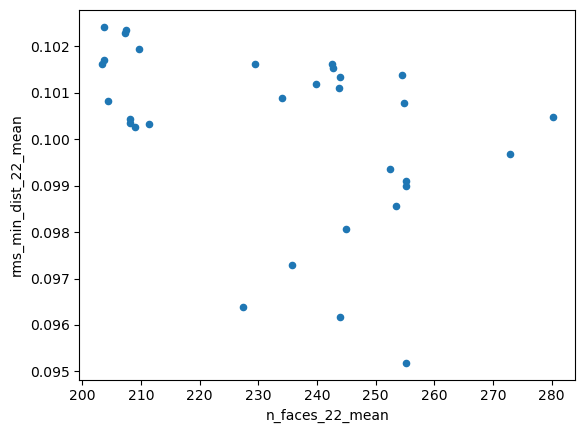

In [87]:
s[s.rms_min_dist_22_mean < (s.rms_min_dist_22_mean.min() + threshold_ratio*(s.rms_min_dist_22_mean.max() - s.rms_min_dist_22_mean.min()))].loc[:, ["rms_min_dist_22_mean", "n_faces_22_mean"]].plot.scatter("n_faces_22_mean", "rms_min_dist_22_mean")

In [44]:
s[s.n_faces_22_mean < s.n_faces_22_mean.quantile(q=0.05)]

target_density  pulse_freq_hz  scan_freq_hz  point_spacing_along  \
name                                                                           
optim_0007       11.313708         534044           202              0.29703   
optim_0015       11.313708         534044           202              0.29703   
optim_0028       11.313708         534044           202              0.29703   
optim_0035       11.313708         534044           202              0.29703   
optim_0050       11.313708         534044           202              0.29703   
optim_0071       11.313708         534044           202              0.29703   
optim_0146       11.313708         534044           202              0.29703   
optim_0154       11.313708         534044           202              0.29703   
optim_0164       11.313708         534044           202              0.29703   
optim_0186       11.313708         534044           202              0.29703   

            point_spacing_across  std_horizontal_error  std_vertical_error  \
name                                                                         
optim_0007               0.13767                   0.0                 0.0   
optim_0015               0.13767                   0.0                 0.0   
optim_0028               0.13767                   0.0                 0.0   
optim_0035               0.13767                   0.0                 0.0   
optim_0050               0.13767                   0.0                 0.0   
optim_0071               0.13767                   0.0                 0.0   
optim_0146               0.13767                   0.0                 0.0   
optim_0154               0.13767                   0.0                 0.0   
optim_0164               0.13767                   0.0                 0.0   
optim_0186               0.13767                   0.0                 0.0   

            r_plane_epsilon  r_plane_k  r_plane_min_points  ...  \
name                                                        ...   
optim_0007         0.591682         23                  23  ...   
optim_0015         0.159715         23                  23  ...   
optim_0028         1.804710         28                  28  ...   
optim_0035         1.886871         29                  29  ...   
optim_0050         0.100000         18                  18  ...   
optim_0071         0.100000         12                  12  ...   
optim_0146         0.100000         27                  27  ...   
optim_0154         0.100000         15                  15  ...   
optim_0164         0.100000         19                  19  ...   
optim_0186         0.100000         30                  30  ...   

            n_faces_22_max  gpkg_total_22  gpkg_unique_22  gpkg_multiple_22  \
name                                                                          
optim_0007           910.0             99              99                 0   
optim_0015           806.0             99              99                 0   
optim_0028           684.0            100              99                 1   
optim_0035           702.0            100              99                 1   
optim_0050           738.0             99              99                 0   
optim_0071           748.0            100              99                 1   
optim_0146           794.0             99              99                 0   
optim_0154           646.0             99              99                 0   
optim_0164           758.0             99              99                 0   
optim_0186           614.0             99              99                 0   

            cj_buildings  cj_building_parts  cj_buildings_with_bp  \
name                                                                
optim_0007           100                 99                    99   
optim_0015           100                 99                    99   
optim_0028           100                100                    99   
optim_0035     

<Axes: >

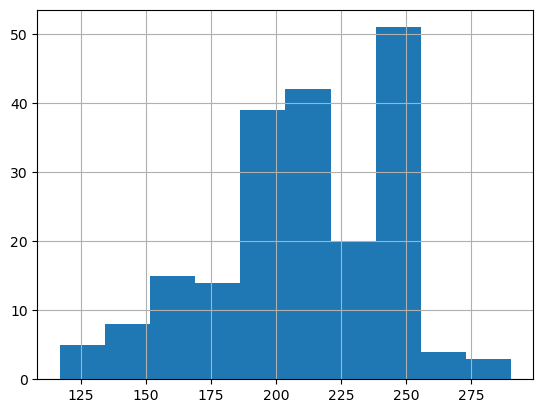

In [40]:
eo.summary_stats.n_faces_22_mean.hist()

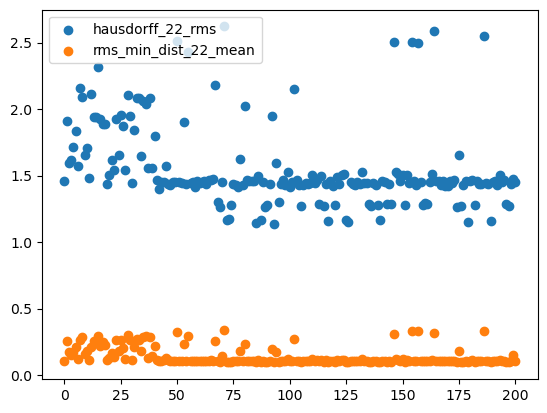

In [23]:
# plt.scatter(range(100), s["iou_22_mean"])
plt.scatter(range(s.shape[0]), s["hausdorff_22_rms"])
plt.scatter(range(s.shape[0]), s["rms_min_dist_22_mean"])
# plt.legend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
plt.legend(["hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.ylim(.2, 0.95)
plt.show()

### Plotting functions

In [25]:
opt_params = [m.split("_", 1)[1] for m in glb.geoflow_optim_parameter_space_narrow.keys()]

def plot_metric_vs_parameter(es: list[Experiment] | Experiment, target_metric: str):
    if isinstance(es, Experiment):
        es = [es]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(opt_params), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="all", layout="constrained")
    
    for i, opt_param in enumerate(opt_params):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                ax = axs[i, j]
            s.plot.scatter(opt_param, target_metric, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [26]:
def plot_metric_vs_metric(es: list[Experiment] | Experiment, x, ys):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(ys), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="row", sharex="row", layout="constrained")
    
    for i, y in enumerate(ys):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                if nrows == 1:
                    ax = axs[j]
                else:
                    ax = axs[i, j]
            s.plot.scatter(x, y, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [35]:
def plot_metric_vs_metric_2(es: list[Experiment] | Experiment, xs, ys, **kwargs):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(xs, str):
        xs = [xs]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    n_dependents = len(ys)
    n_independents = len(xs)
    nrows, ncols = n_independents * n_dependents, len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="row", layout="constrained")
    
    for h, x in enumerate(xs):
        for i, y in enumerate(ys):
            for j, s in enumerate(stats):
                if ncols == 1:
                    ax = axs[(h * n_dependents) + i]
                else:
                    if nrows == 1:
                        ax = axs[j]
                    else:
                        ax = axs[(h * n_dependents) + i, j]
                s.plot.scatter(x, y, ax=ax, **kwargs)
                if (h + i) == 0:
                    ax.set_title(es[j].name)
                # if (i + 1) == len(ys):
                #     ax.tick_params(axis="both", reset=True)
        
    plt.show()

In [ ]:
plot_metric_vs_parameter(eo, "n_faces_22_mean")

In [ ]:
plot_metric_vs_metric_2(eo, opt_params, ["rms_min_dist_22_mean", "n_faces_22_mean"])

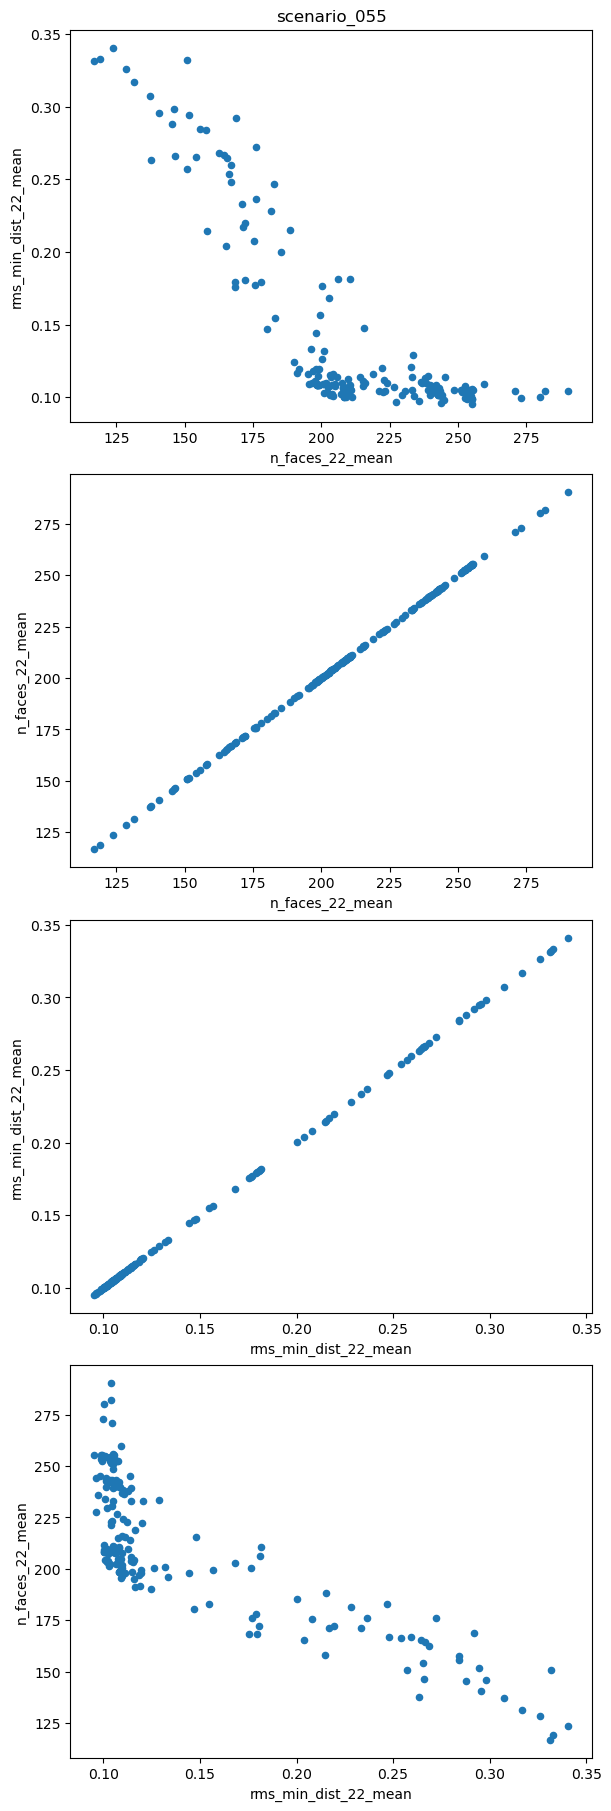

In [52]:
plot_metric_vs_metric_2(eo, ["n_faces_22_mean", "rms_min_dist_22_mean"], ["rms_min_dist_22_mean", "n_faces_22_mean"])